Problem 1 : Sparkling Wine

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import month_plot
from sklearn.metrics import mean_squared_error

In [26]:
# Get the Data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Data/Sparkling.csv"
df=pd.read_csv(path, parse_dates = ['YearMonth'], index_col = 'YearMonth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df.head()

YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

`Basic Details of Data`

In [22]:
df.shape

(187, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [24]:
pd.DataFrame(df.dtypes,columns=['Data Type'])

Data Type
YearMonth  datetime64[ns]
Sparkling           int64

In [19]:
df.dtypes

Sparkling    int64
dtype: object

`Check for Null Values`

In [ ]:
df.isnull().sum()

Sparkling    0
dtype: int64

`Plot the Time Series`










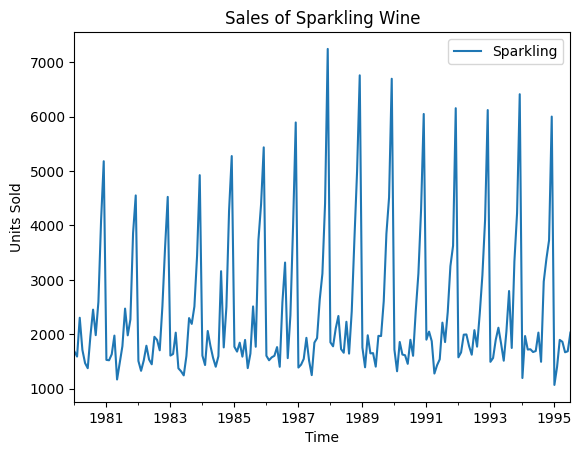

In [27]:
df.plot()
plt.title('Sales of Sparkling Wine', fontsize=12)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

`Check basic description`



In [29]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

### Yearly Representation 



`Box Plot of Yearly Wine Sales`

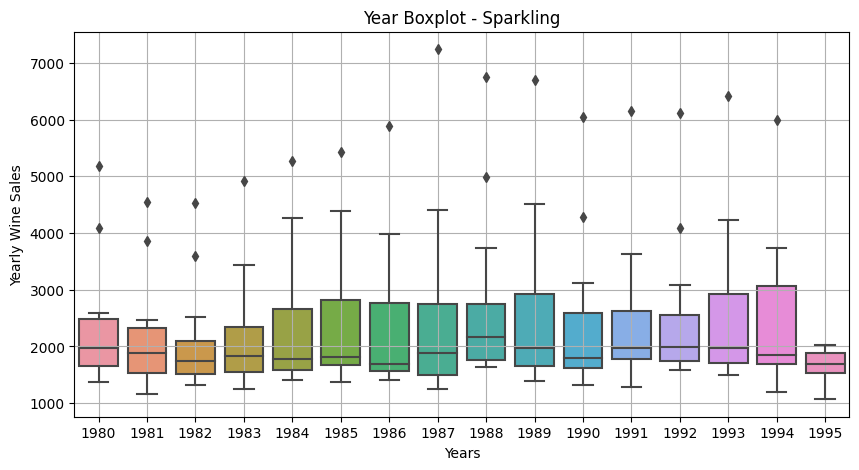

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = df.index.year,y = df.Sparkling)
plt.title('Year Boxplot - Sparkling', fontsize=12)
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales')
plt.grid();

### Monthly Representation 



`Box Plot of Monthly Wine Sales`

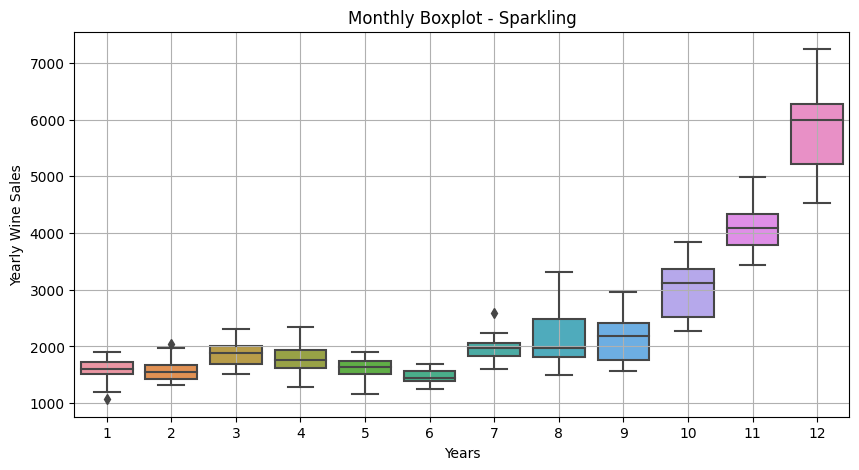

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = df.index.month,y = df.Sparkling)
plt.title('Monthly Boxplot - Sparkling')
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales')
plt.grid();

`Plot a monthplot of the give Time Series`

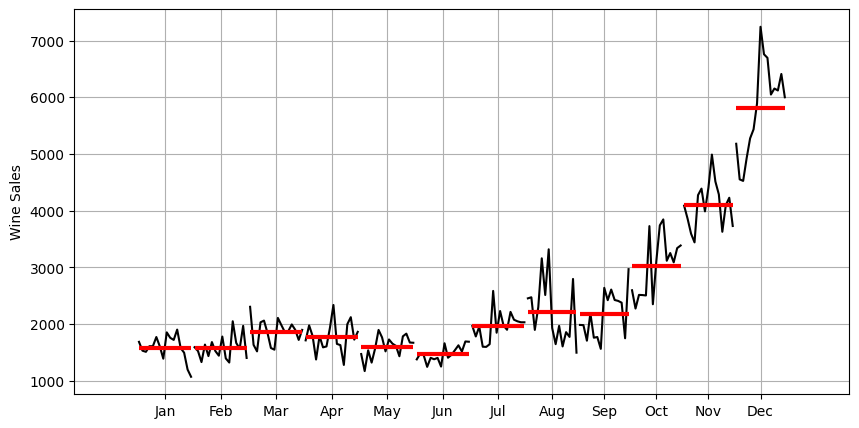

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();


`Plot graph of monthly Wine sales across years`

In [33]:
monthly_sales_across_years = pd.pivot_table(pd.DataFrame(df), columns = df.index.month, 
                                                      index = df.index.year)
monthly_sales_across_years

Sparkling                                                          \
YearMonth        1       2       3       4       5       6       7       8    
YearMonth                                                                     
1980         1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981         1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982         1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983         1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984         1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985         1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986         1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987         1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988         1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989         1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990         1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991         1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992         1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993         1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994         1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995         1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

                                           
YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

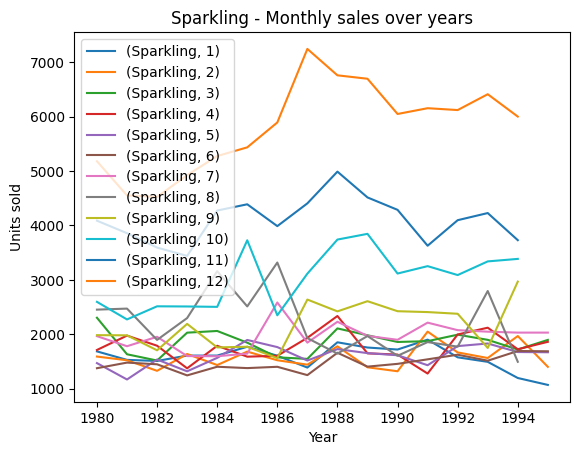

In [34]:
monthly_sales_across_years.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years')
plt.show()

### Decomposition

`Additive Decomposition`

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_add_decomp=seasonal_decompose(df,model='additive')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

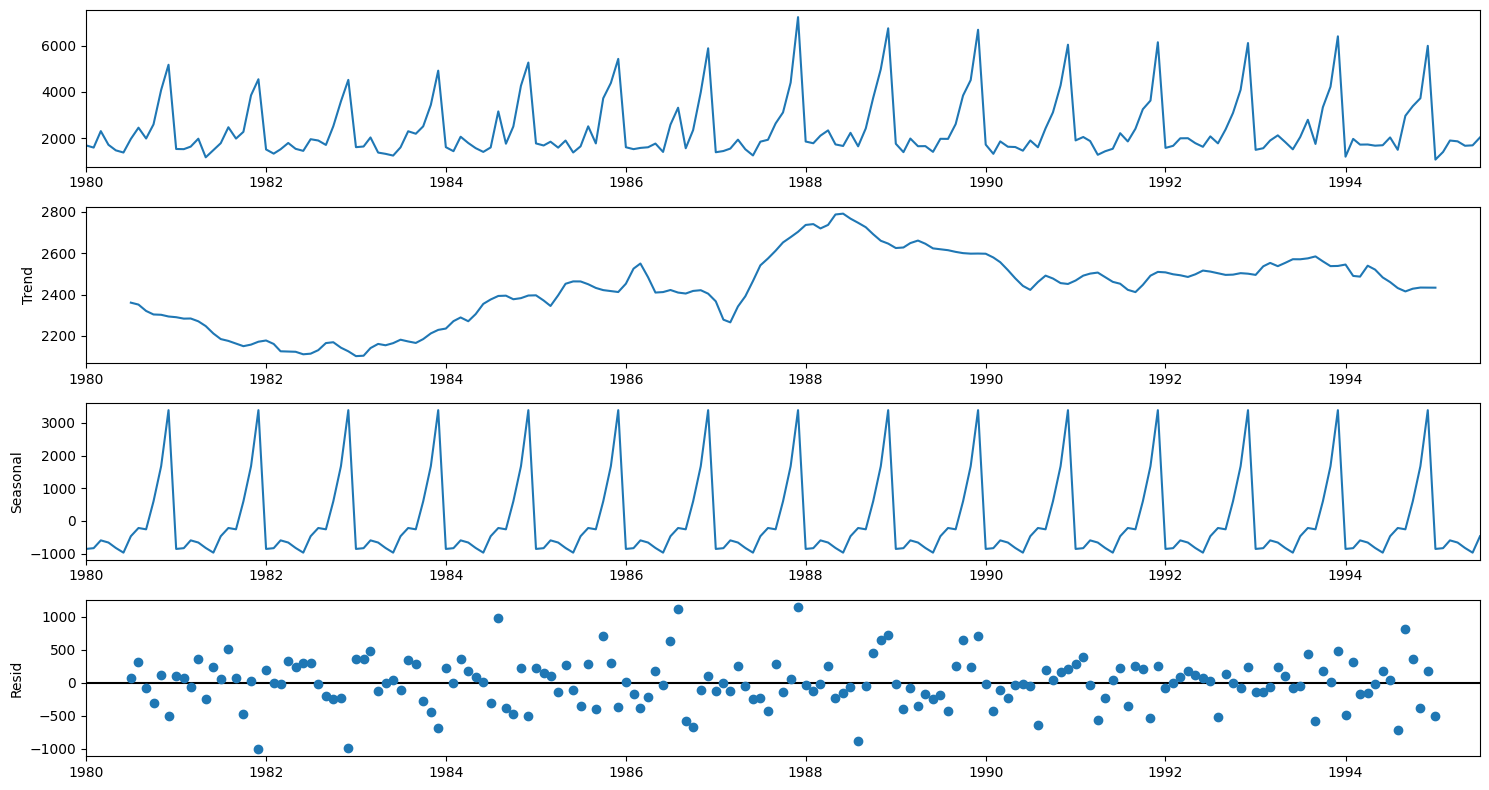

In [ ]:
df_add_decomp.plot();

In [ ]:
df_add_decomp_compenents=pd.concat([df_add_decomp.trend,df_add_decomp.seasonal,df_add_decomp.resid],axis=1)
df_add_decomp_compenents[0:23].round(3)

trend  seasonal    resid
YearMonth                              
1980-01-01       NaN  -854.261      NaN
1980-02-01       NaN  -830.351      NaN
1980-03-01       NaN  -592.357      NaN
1980-04-01       NaN  -658.491      NaN
1980-05-01       NaN  -824.416      NaN
1980-06-01       NaN  -967.434      NaN
1980-07-01  2360.667  -465.502   70.836
1980-08-01  2351.333  -214.333  315.999
1980-09-01  2320.542  -254.677  -81.864
1980-10-01  2303.583   599.770 -307.353
1980-11-01  2302.042  1675.067  109.891
1980-12-01  2293.792  3386.984 -501.776
1981-01-01  2290.375  -854.261   93.886
1981-02-01  2283.458  -830.351   69.892
1981-03-01  2284.125  -592.357  -58.768
1981-04-01  2270.542  -658.491  363.949
1981-05-01  2247.500  -824.416 -253.084
1981-06-01  2211.750  -967.434  235.684
1981-07-01  2184.750  -465.502   61.752
1981-08-01  2175.833  -214.333  510.499
1981-09-01  2162.958  -254.677   72.719
1981-10-01  2150.417   599.770 -477.187
1981-11-01  2157.958  1675.067   23.974

`Multiplicative Decomposition`

In [ ]:
df_mult_decomp=seasonal_decompose(df,model='multiplicative',period=12)

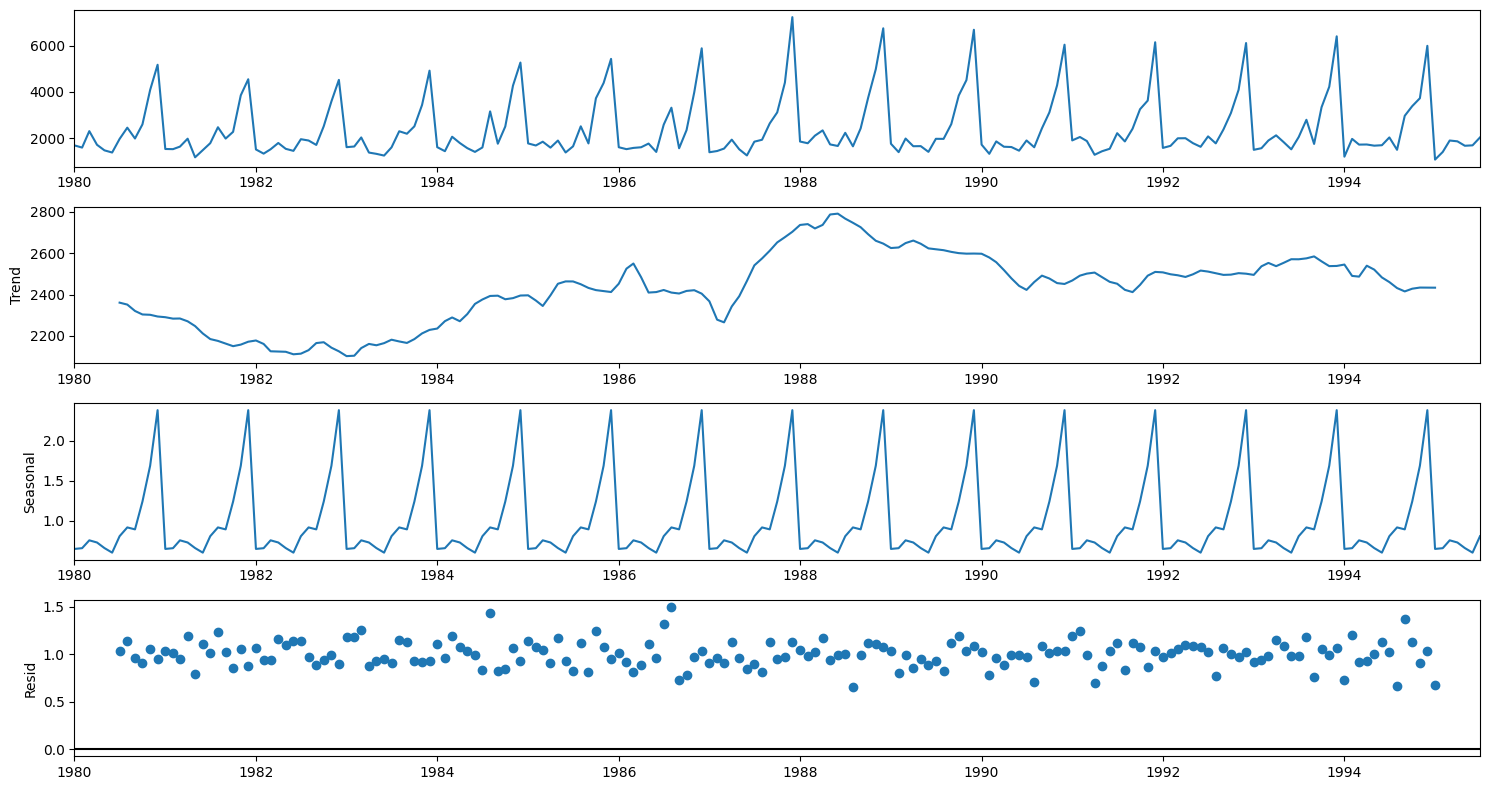

In [ ]:
df_mult_decomp.plot();

In [ ]:
df_mult_decomp_compenents=pd.concat([df_mult_decomp.trend,df_mult_decomp.seasonal,df_mult_decomp.resid],axis=1)
df_mult_decomp_compenents[0:23].round(3)

trend  seasonal  resid
YearMonth                            
1980-01-01       NaN     0.650    NaN
1980-02-01       NaN     0.659    NaN
1980-03-01       NaN     0.757    NaN
1980-04-01       NaN     0.730    NaN
1980-05-01       NaN     0.661    NaN
1980-06-01       NaN     0.603    NaN
1980-07-01  2360.667     0.809  1.029
1980-08-01  2351.333     0.919  1.135
1980-09-01  2320.542     0.894  0.956
1980-10-01  2303.583     1.242  0.908
1980-11-01  2302.042     1.690  1.050
1980-12-01  2293.792     2.385  0.947
1981-01-01  2290.375     0.650  1.028
1981-02-01  2283.458     0.659  1.012
1981-03-01  2284.125     0.757  0.944
1981-04-01  2270.542     0.730  1.192
1981-05-01  2247.500     0.661  0.788
1981-06-01  2211.750     0.603  1.109
1981-07-01  2184.750     0.809  1.007
1981-08-01  2175.833     0.919  1.236
1981-09-01  2162.958     0.894  1.024
1981-10-01  2150.417     1.242  0.851
1981-11-01  2157.958     1.690  1.057

## 3. Split the data into training and test. The test data should start in 1991.

In [37]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']

In [38]:
print(df_train.shape)
print(df_test.shape)

(132, 1)
(55, 1)


In [39]:
print('First few rows of Training Data','\n',df_train.head(),'\n')
print('Last few rows of Training Data','\n',df_train.tail(),'\n')
print('First few rows of Test Data','\n',df_test.head(),'\n')
print('Last few rows of Test Data','\n',df_test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



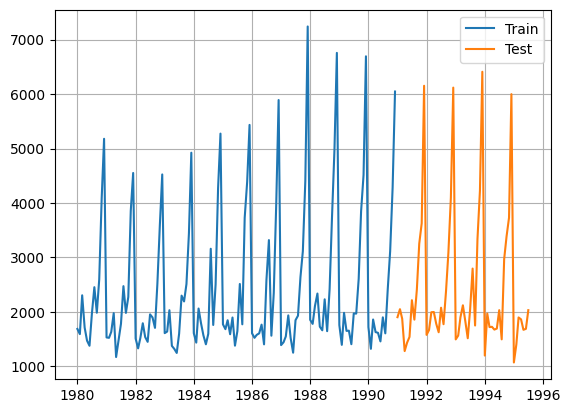

In [40]:
plt.plot( df_train.Sparkling, label='Train');
plt.plot(df_test.Sparkling, label='Test');
plt.legend(loc='best');
plt.grid();

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [86]:
time_train = [i+1 for i in range(len(df_train))]
time_test = [i+133 for i in range(len(df_test))]
print('Training Time','\n',time_train)
print('Test Time','\n',time_test)

Training Time 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [87]:
df_train['time'] = time_train
df_test['time'] = time_test

In [88]:
display(df_train.head())
print('First Few Rows of Train Data')

display(df_train.tail())
print('Last Few Rows of Train Data')

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

First Few Rows of Train Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

Last Few Rows of Train Data


In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_train[['time']],df_train.Sparkling)
df_test['forecast_lr'] = lr.predict(df_test[['time']])
df_test[['Sparkling','forecast_lr']].head().round(3)

Sparkling  forecast_lr
YearMonth                         
1991-01-01       1902     2791.652
1991-02-01       2049     2797.485
1991-03-01       1874     2803.317
1991-04-01       1279     2809.150
1991-05-01       1432     2814.983

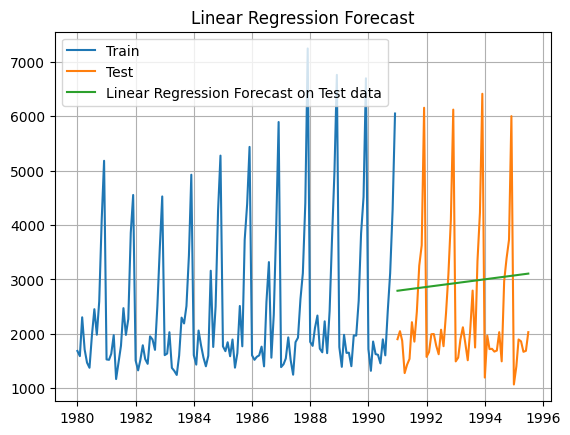

In [90]:
plt.plot( df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on Test data')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression Forecast');

`Model Evaluation`

In [91]:
rmse_lr = mean_squared_error(df_test.Sparkling,df_test.forecast_lr,squared=False)
rmse_lr.round(3)

1389.135

In [177]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1389.135175

### Model 2: Naive Approach

In [92]:
df_test['forecast_naive'] = df_train['Sparkling'][-1]
df_test[['Sparkling','forecast_naive']].head()

Sparkling  forecast_naive
YearMonth                            
1991-01-01       1902            6047
1991-02-01       2049            6047
1991-03-01       1874            6047
1991-04-01       1279            6047
1991-05-01       1432            6047

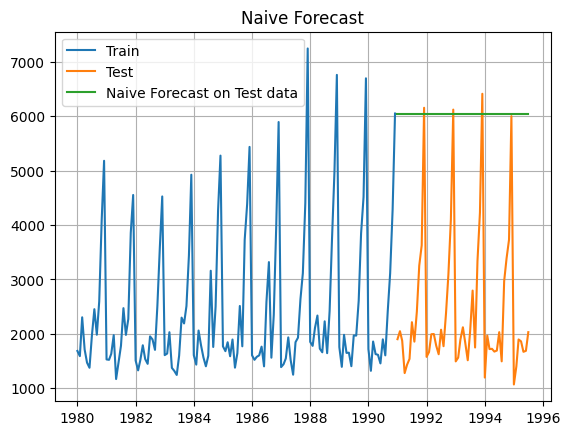

In [93]:
plt.plot( df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_naive, label='Naive Forecast on Test data')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecast');

`Model Evaluation`

In [94]:
rmse_naive = mean_squared_error(df_test.Sparkling,df_test.forecast_naive,squared=False)
rmse_naive

3864.2793518443914

In [178]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  1389.135175
Naive Forecast     3864.279352

### Model 3: Simple Average

In [95]:
df_test['forecast_sa'] = df_train.Sparkling.mean()
df_test[['Sparkling','forecast_sa']].head().round(3)

Sparkling  forecast_sa
YearMonth                         
1991-01-01       1902      2403.78
1991-02-01       2049      2403.78
1991-03-01       1874      2403.78
1991-04-01       1279      2403.78
1991-05-01       1432      2403.78

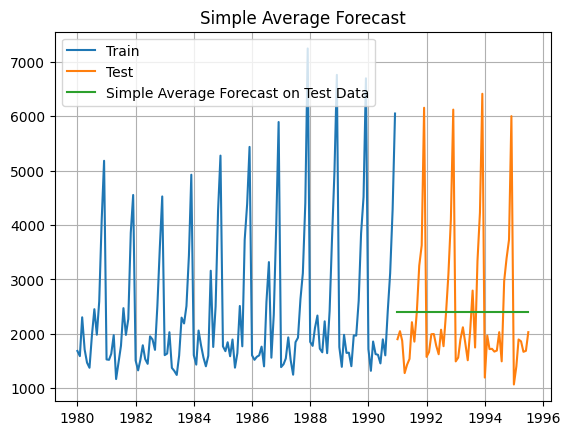

In [96]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

`Model Evaluation`

In [97]:
rmse_sa = mean_squared_error(df_test.Sparkling,df_test.forecast_sa,squared=False)
rmse_sa

1275.0818036965309

In [179]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression  1389.135175
Naive Forecast     3864.279352
Simple Average     1275.081804

### Model 4: Simple Exponential Smoothing

In [99]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
ses_optimized=SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(optimized=True)
ses_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


name        param  optimized
smoothing_level  alpha     0.070288       True
initial_level      l.0  1763.926993       True

In [100]:
df_test['forecast_ses_optimized'] = ses_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_ses_optimized']].head().round(3)

Sparkling  forecast_ses_optimized
YearMonth                                    
1991-01-01       1902                2804.663
1991-02-01       2049                2804.663
1991-03-01       1874                2804.663
1991-04-01       1279                2804.663
1991-05-01       1432                2804.663

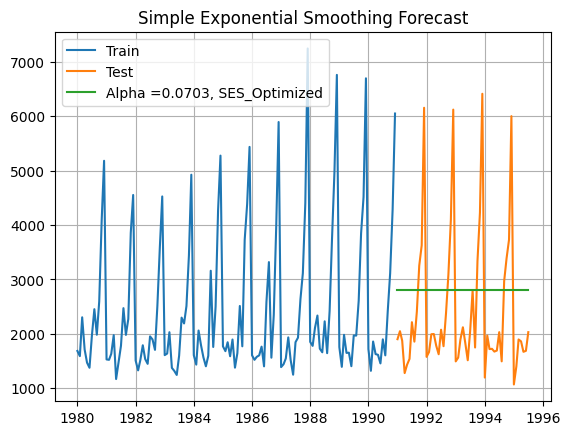

In [101]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0703, SES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Forecast');

`Model Evaluation`

In [102]:
rmse_ses_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_ses_optimized,squared=False)
rmse_ses_optimized

1338.0046232563645

In [180]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_ses_optimized]},index=['Simple Exponential Smoothing Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test RMSE
Linear Regression                      1389.135175
Naive Forecast                         3864.279352
Simple Average                         1275.081804
Simple Exponential Smoothing Forecast  1338.004623

`Optimizing Alpha based on Test RMSE`

In [103]:
results_ses = pd.DataFrame({'Alpha_Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_ses 

for i in np.arange(0.1,1.1,0.1):
    ses_iteration=SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=i,optimized=False,use_brute=True)
    rmse_train = mean_squared_error(df_train.Sparkling,ses_iteration.fittedvalues,squared=False)
    rmse_test = mean_squared_error(df_test.Sparkling,ses_iteration.forecast(steps=len(df_test)),squared=False)
    results_ses=results_ses.append({'Alpha_Values':i,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_ses

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values   RMSE_Train    RMSE_Test
0           0.1  1336.428478  1375.393335
1           0.2  1356.950475  1595.206839
2           0.3  1359.953398  1935.507132
3           0.4  1352.861879  2311.919615
4           0.5  1344.203449  2666.351413
5           0.6  1338.961583  2979.204388
6           0.7  1338.969940  3249.944092
7           0.8  1344.565990  3483.801006
8           0.9  1355.815758  3686.794285
9           1.0  1373.175719  3864.279352

In [104]:
results_ses.sort_values(by='RMSE_Test').head().round(3)

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1    1336.428   1375.393
1           0.2    1356.950   1595.207
2           0.3    1359.953   1935.507
3           0.4    1352.862   2311.920
4           0.5    1344.203   2666.351

`Best SES Model`

In [105]:
ses= SimpleExpSmoothing(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=0.1,optimized=False,use_brute=True)
ses.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name   param  optimized
smoothing_level  alpha     0.1      False
initial_level      l.0  1502.2      False

In [106]:
df_test['forecast_ses'] = ses.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_ses_optimized','forecast_ses']].head().round(3)

Sparkling  forecast_ses_optimized  forecast_ses
YearMonth                                                  
1991-01-01       1902                2804.663      2914.795
1991-02-01       2049                2804.663      2914.795
1991-03-01       1874                2804.663      2914.795
1991-04-01       1279                2804.663      2914.795
1991-05-01       1432                2804.663      2914.795

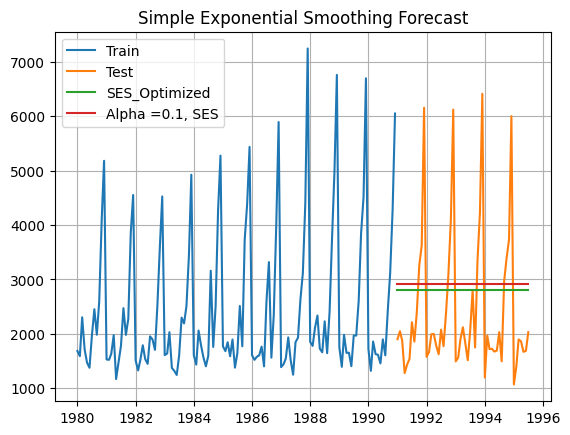

In [107]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='SES_Optimized')
plt.plot(df_test.forecast_ses, label='Alpha =0.1, SES')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Exponential Smoothing Forecast with alpha =0.1');

`Model Evaluation`

In [108]:
rmse_ses = mean_squared_error(df_test.Sparkling,df_test.forecast_ses,squared=False)
rmse_ses

1375.3933349669476

In [181]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Simple Exponential Smoothing Forecast with alpha =0.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf


Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335

### Model 5: Double Exponential Smoothing

In [109]:
des_optimized = Holt(df_train.Sparkling,initialization_method='estimated').fit(optimized=True)
des_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


name        param  optimized
smoothing_level  alpha     0.665000       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1502.200000       True
initial_trend      b.0    74.872727       True

In [110]:
df_test['forecast_des_optimized'] = des_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_des_optimized']].head().round(3)

Sparkling  forecast_des_optimized
YearMonth                                    
1991-01-01       1902                5401.733
1991-02-01       2049                5476.005
1991-03-01       1874                5550.277
1991-04-01       1279                5624.550
1991-05-01       1432                5698.822

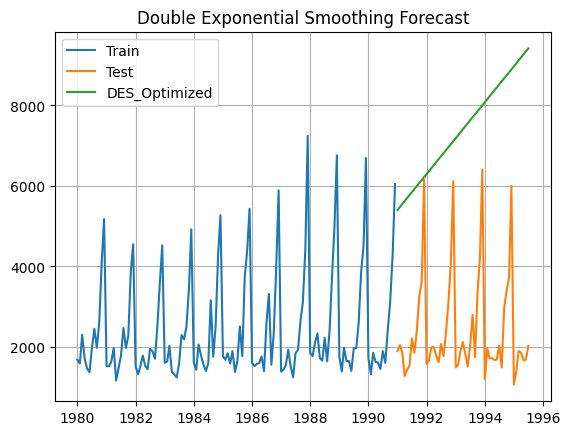

In [111]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_des_optimized, label='DES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Forecast');

`Model Evaluation`

In [112]:
rmse_des_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_des_optimized,squared=False)
rmse_des_optimized

5291.879833226911

In [182]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_des_optimized]},index=['Double Exponential Smoothing Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833

`Optimizing Alpha and Beta based on Test RMSE`

In [113]:
results_des = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'RMSE_Train':[],'RMSE_Test': []})

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        des_iteration=Holt(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=i,smoothing_trend=j,
                                                                                  optimized=False,use_brute=True)
        rmse_train = mean_squared_error(df_train.Sparkling,des_iteration.fittedvalues,squared=False)
        rmse_test = mean_squared_error(df_test.Sparkling,des_iteration.forecast(steps=len(df_test)),squared=False)
        results_des=results_des.append({'Alpha_Values':i, 'Beta Values':j,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_des

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values   RMSE_Train     RMSE_Test
0            0.1          0.1  1373.320853   1777.734773
1            0.1          0.2  1403.485779   2599.314701
2            0.1          0.3  1434.781023   4287.469279
3            0.1          0.4  1469.714230   6044.157399
4            0.1          0.5  1509.672437   7386.659388
..           ...          ...          ...           ...
95           1.0          0.6  1753.408203  49327.087977
96           1.0          0.7  1825.208810  52655.765663
97           1.0          0.8  1902.059815  55442.273880
98           1.0          0.9  1985.450202  57823.177011
99           1.0          1.0  2077.802588  59877.076519

[100 rows x 4 columns]

In [114]:
results_des.sort_values(by='RMSE_Test').head().round(3)

Alpha_Values  Beta Values  RMSE_Train  RMSE_Test
0            0.1          0.1    1373.321   1777.735
1            0.1          0.2    1403.486   2599.315
10           0.2          0.1    1413.418   3611.767
2            0.1          0.3    1434.781   4287.469
20           0.3          0.1    1428.611   5908.186

`Final DES Model`

In [115]:
des= Holt(df_train.Sparkling,initialization_method='estimated').fit(smoothing_level=0.1,smoothing_trend=0.1,
                                                                 optimized=False,use_brute=True)
des.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level  alpha     0.100000      False
smoothing_trend   beta     0.100000      False
initial_level      l.0  1502.200000      False
initial_trend      b.0    74.872727      False

In [116]:
df_test['forecast_des'] = des.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_des_optimized','forecast_des']].head().round(3)

Sparkling  forecast_des_optimized  forecast_des
YearMonth                                                  
1991-01-01       1902                5401.733      2847.662
1991-02-01       2049                5476.005      2874.629
1991-03-01       1874                5550.277      2901.596
1991-04-01       1279                5624.550      2928.563
1991-05-01       1432                5698.822      2955.530

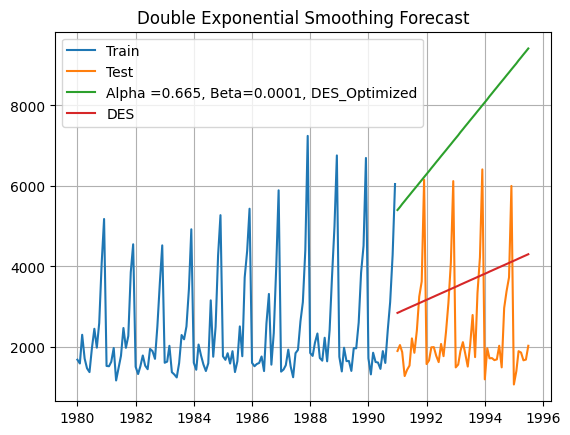

In [117]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0.665, Beta=0.0001, DES_Optimized')
plt.plot(df_test.forecast_des, label='DES')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Forecast Alpha =0.665, Beta=0.0001');

In [118]:
rmse_des = mean_squared_error(df_test.Sparkling,df_test.forecast_des,squared=False)
rmse_des

1777.7347728870993

In [183]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_des]},index=['Double Exponential Smoothing Forecast Alpha =0.665, Beta=0.0001'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773

### Model 6: Triple Exponential Smoothing with Additive trend & Additive seasonality

In [119]:
tes_add_add_optimized = ExponentialSmoothing(df_train.Sparkling,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
tes_add_add_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.111272       True
smoothing_trend      beta     0.012361       True
smoothing_seasonal  gamma     0.460718       True
initial_level         l.0  2356.578308       True
initial_trend         b.0    -0.018536       True
initial_seasons.0     s.0  -636.233605       True
initial_seasons.1     s.1  -722.983634       True
initial_seasons.2     s.2  -398.643611       True
initial_seasons.3     s.3  -473.430845       True
initial_seasons.4     s.4  -808.425255       True
initial_seasons.5     s.5  -815.350250       True
initial_seasons.6     s.6  -384.230670       True
initial_seasons.7     s.7    72.995081       True
initial_seasons.8     s.8  -237.442729       True
initial_seasons.9     s.9   272.325846       True
initial_seasons.10   s.10  1541.378210       True
initial_seasons.11   s.11  2590.077539       True

In [120]:
df_test['forecast_tes_add_add_optimized'] = tes_add_add_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_add_add_optimized']].head().round(3)

Sparkling  forecast_tes_add_add_optimized
YearMonth                                            
1991-01-01       1902                        1490.574
1991-02-01       2049                        1204.714
1991-03-01       1874                        1688.941
1991-04-01       1279                        1551.451
1991-05-01       1432                        1461.440

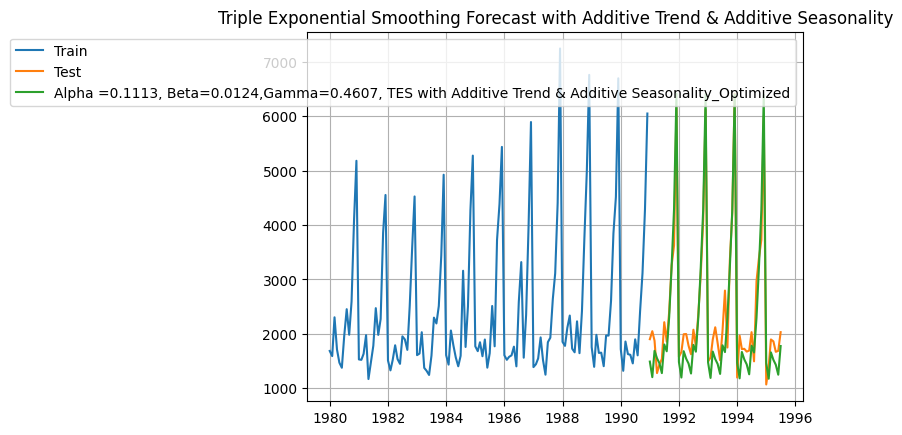

In [121]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with Additive Trend & Additive Seasonality_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality');

In [122]:
rmse_tes_add_add_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_add_optimized,squared=False)
rmse_tes_add_add_optimized

378.6262408893861

In [184]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_add_add_optimized]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [123]:
results_tes_add_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_add_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='additive').fit(
                smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_add_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_add_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_add=results_tes_add_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_add


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train     RMSE_Test
0             0.1          0.1           0.1  4.289336e+02  5.070448e+02
1             0.1          0.1           0.2  4.009490e+02  6.380307e+02
2             0.1          0.1           0.3  3.856796e+02  7.430712e+02
3             0.1          0.1           0.4  3.789580e+02  8.079145e+02
4             0.1          0.1           0.5  3.781684e+02  8.409559e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.417157e+04  4.624388e+05
996           1.0          1.0           0.7  6.992263e+04  2.250627e+06
997           1.0          1.0           0.8  3.008867e+05  7.323386e+06
998           1.0          1.0           0.9  1.096286e+06  2.612667e+07
999           1.0          1.0           1.0  3.452000e+06  1.068247e+08

[1000 rows x 5 columns]

In [124]:
results_tes_add_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
30            0.1          0.4           0.1       451.6      342.9
110           0.2          0.2           0.1       455.0      343.1
156           0.2          0.6           0.7       492.6      348.8
200           0.3          0.1           0.1       454.3      390.8
20            0.1          0.3           0.1       443.2      391.3

`Final TES Model with Additive trend & Additive seasonality`

In [125]:
tes_add_add= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.4,smoothing_seasonal=0.1, optimized=False,use_brute=True)
tes_add_add.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.100000      False
smoothing_trend      beta     0.400000      False
smoothing_seasonal  gamma     0.100000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0    -9.181061      False
initial_seasons.0     s.0  -636.186632      False
initial_seasons.1     s.1  -722.947049      False
initial_seasons.2     s.2  -398.707465      False
initial_seasons.3     s.3  -473.405382      False
initial_seasons.4     s.4  -808.384549      False
initial_seasons.5     s.5  -815.311632      False
initial_seasons.6     s.6  -384.228299      False
initial_seasons.7     s.7    72.948785      False
initial_seasons.8     s.8  -237.394965      False
initial_seasons.9     s.9   272.334201      False
initial_seasons.10   s.10  1541.282118      False
initial_seasons.11   s.11  2590.000868      False

In [126]:
df_test['forecast_tes_add_add'] = tes_add_add.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_add_add_optimized','forecast_tes_add_add']].head().round(3)

Sparkling  forecast_tes_add_add_optimized  forecast_tes_add_add
YearMonth                                                                  
1991-01-01       1902                        1490.574              1613.406
1991-02-01       2049                        1204.714              1478.757
1991-03-01       1874                        1688.941              1833.235
1991-04-01       1279                        1551.451              1760.758
1991-05-01       1432                        1461.440              1555.702

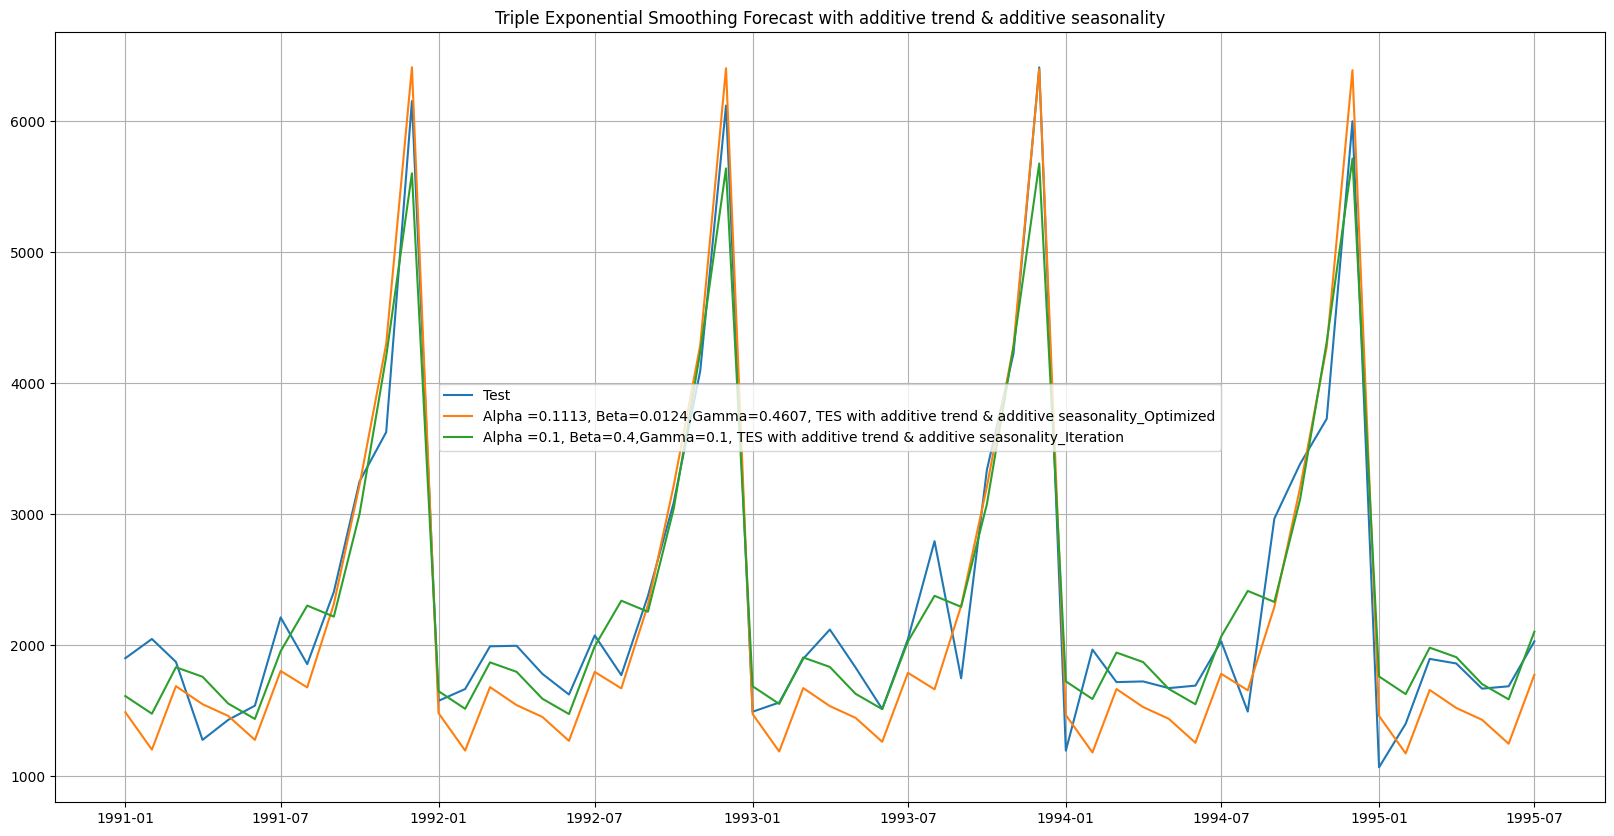

In [127]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with additive trend & additive seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_add, 
         label='Alpha =0.1, Beta=0.4,Gamma=0.1, TES with additive trend & additive seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with additive trend & additive seasonality');

In [128]:
rmse_tes_add_add = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_add,squared=False)
rmse_tes_add_add

342.9347159178277

In [185]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_tes_add_add]},index=['Triple Exponential Smoothing Forecast with additive trend & additive seasonality Alpha =0.1, Beta=0.4,Gamma=0.1,'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716

### Model 7: Triple Exponential Smoothing with Additive Trend & Multiplicative Seasonality

In [129]:
tes_add_mult_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',
                                              seasonal='multiplicative').fit(optimized=True)
tes_add_mult_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.111199       True
smoothing_trend      beta     0.049431       True
smoothing_seasonal  gamma     0.362053       True
initial_level         l.0  2356.526439       True
initial_trend         b.0    -9.443690       True
initial_seasons.0     s.0     0.713256       True
initial_seasons.1     s.1     0.683325       True
initial_seasons.2     s.2     0.905378       True
initial_seasons.3     s.3     0.805618       True
initial_seasons.4     s.4     0.656397       True
initial_seasons.5     s.5     0.654515       True
initial_seasons.6     s.6     0.886902       True
initial_seasons.7     s.7     1.134240       True
initial_seasons.8     s.8     0.919277       True
initial_seasons.9     s.9     1.213967       True
initial_seasons.10   s.10     1.869417       True
initial_seasons.11   s.11     2.373446       True

In [130]:
df_test['forecast_tes_add_mult_optimized'] = tes_add_mult_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_add_mult_optimized']].head().round(3)

Sparkling  forecast_tes_add_mult_optimized
YearMonth                                             
1991-01-01       1902                         1587.686
1991-02-01       2049                         1356.590
1991-03-01       1874                         1763.122
1991-04-01       1279                         1656.380
1991-05-01       1432                         1542.187

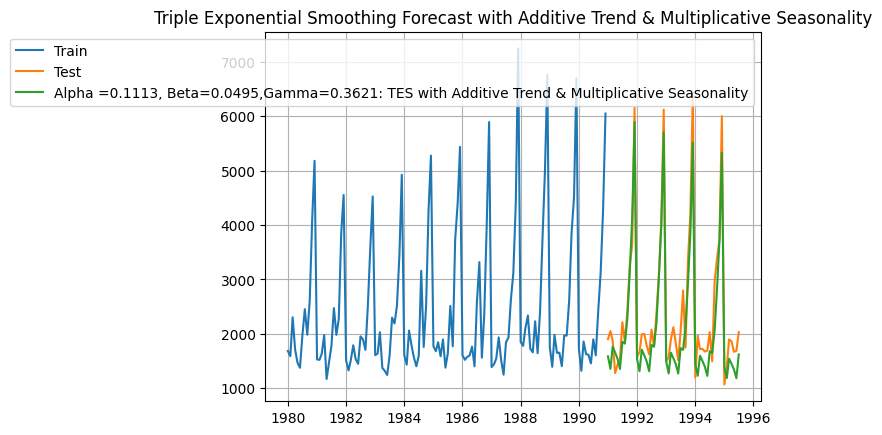

In [131]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [132]:
rmse_tes_add_mult_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_mult_optimized,squared=False)
rmse_tes_add_mult_optimized

403.7062277856435

In [186]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_tes_add_mult_optimized]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [133]:
results_tes_add_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_mult_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_add_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_add_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_mult=results_tes_add_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_mult

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train     RMSE_Test
0             0.1          0.1           0.1  3.814397e+02  5.910387e+02
1             0.1          0.1           0.2  3.677929e+02  6.214407e+02
2             0.1          0.1           0.3  3.614334e+02  6.395595e+02
3             0.1          0.1           0.4  3.607002e+02  6.447910e+02
4             0.1          0.1           0.5  3.644451e+02  6.410980e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.882994e+05  4.386054e+06
996           1.0          1.0           0.7  2.660015e+05  8.649577e+06
997           1.0          1.0           0.8  1.101923e+06  2.700435e+05
998           1.0          1.0           0.9  7.695708e+04  2.472201e+05
999           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[1000 rows x 5 columns]

In [134]:
results_tes_add_mult.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
301           0.4          0.1           0.2       384.5      317.4
211           0.3          0.2           0.2       388.5      329.0
200           0.3          0.1           0.1       388.2      337.1
110           0.2          0.2           0.1       398.5      340.2
402           0.5          0.1           0.3       396.6      345.9

`Final TES Model with Additive Trend & Multiplicative Seasonality`

In [135]:
tes_add_mult= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='additive',seasonal='multiplicative').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2, optimized=False,use_brute=True)

tes_add_mult.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.200000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0    -9.181061      False
initial_seasons.0     s.0     0.711669      False
initial_seasons.1     s.1     0.673093      False
initial_seasons.2     s.2     0.819432      False
initial_seasons.3     s.3     0.784295      False
initial_seasons.4     s.4     0.634248      False
initial_seasons.5     s.5     0.631758      False
initial_seasons.6     s.6     0.826477      False
initial_seasons.7     s.7     1.031811      False
initial_seasons.8     s.8     0.892631      False
initial_seasons.9     s.9     1.123143      False
initial_seasons.10   s.10     1.698726      False
initial_seasons.11   s.11     2.172717      False

In [136]:
df_test['forecast_tes_add_mult'] = tes_add_mult.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_add_mult_optimized','forecast_tes_add_mult']].head().round(3)

Sparkling  forecast_tes_add_mult_optimized  forecast_tes_add_mult
YearMonth                                                                    
1991-01-01       1902                         1587.686               1558.096
1991-02-01       2049                         1356.590               1425.211
1991-03-01       1874                         1763.122               1844.093
1991-04-01       1279                         1656.380               1791.818
1991-05-01       1432                         1542.187               1658.894

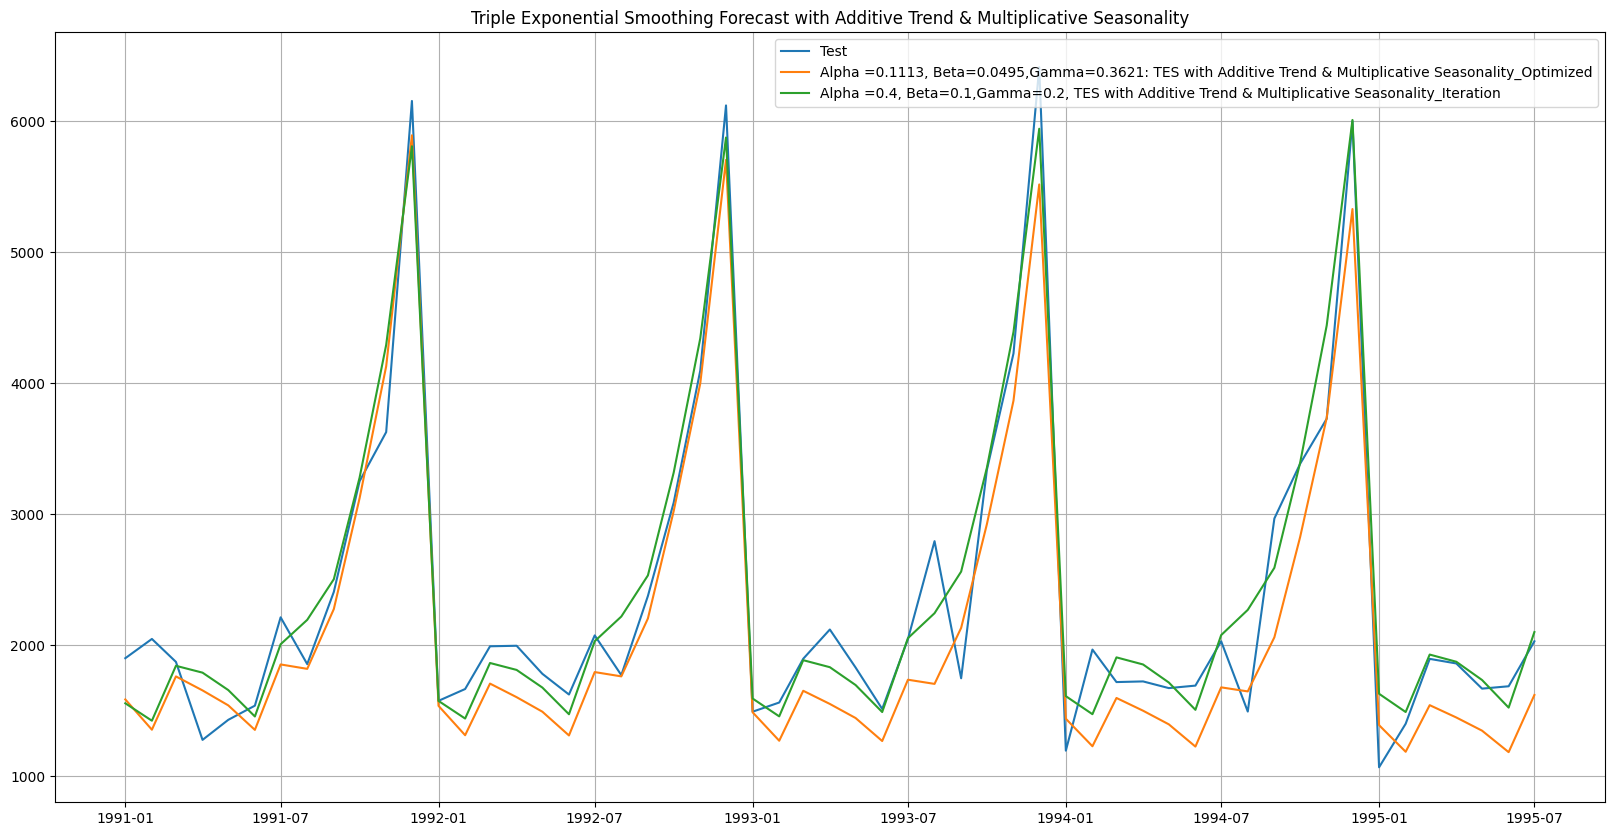

In [137]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_mult, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.2, TES with Additive Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [138]:
rmse_tes_add_mult = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_add_mult,squared=False)
rmse_tes_add_mult

317.4343020026501

In [187]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_tes_add_mult]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality Alpha =0.4, Beta=0.1,Gamma=0.2'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302

### Model 8: Triple Exponential Smoothing with Multiplicative Trend & Multiplicative Seasonality

In [139]:
tes_mult_mult_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
                                              seasonal='multiplicative').fit(optimized=True)
tes_mult_mult_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.111072       True
smoothing_trend      beta     0.049365       True
smoothing_seasonal  gamma     0.362156       True
initial_level         l.0  2356.541815       True
initial_trend         b.0     0.998726       True
initial_seasons.0     s.0     0.731336       True
initial_seasons.1     s.1     0.698686       True
initial_seasons.2     s.2     0.900316       True
initial_seasons.3     s.3     0.810170       True
initial_seasons.4     s.4     0.668612       True
initial_seasons.5     s.5     0.669382       True
initial_seasons.6     s.6     0.879057       True
initial_seasons.7     s.7     1.116572       True
initial_seasons.8     s.8     0.915567       True
initial_seasons.9     s.9     1.181737       True
initial_seasons.10   s.10     1.846128       True
initial_seasons.11   s.11     2.347474       True

In [140]:
df_test['forecast_tes_mult_mult_optimized'] = tes_mult_mult_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_mult_mult_optimized']].head().round(3)

Sparkling  forecast_tes_mult_mult_optimized
YearMonth                                              
1991-01-01       1902                          1591.454
1991-02-01       2049                          1360.482
1991-03-01       1874                          1767.998
1991-04-01       1279                          1661.668
1991-05-01       1432                          1547.441

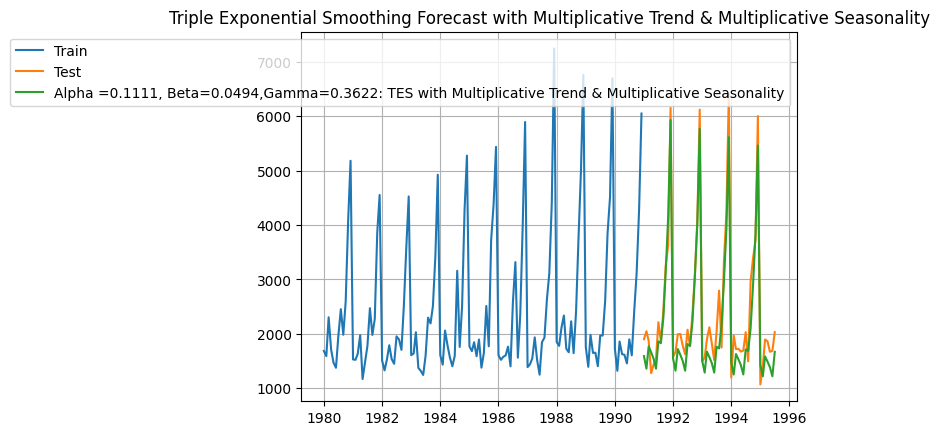

In [141]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.1111, Beta=0.0494,Gamma=0.3622: TES with Multiplicative Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [142]:
rmse_tes_mult_mult_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_mult_optimized,squared=False)
rmse_tes_mult_mult_optimized

380.3928248482875

In [188]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_mult_optimized]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [143]:
results_tes_mult_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_mult_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_mult_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_mult_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_mult=results_tes_mult_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_mult

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  3.800618e+02   5.439806e+02
1             0.1          0.1           0.2  3.668877e+02   5.614318e+02
2             0.1          0.1           0.3  3.609972e+02   5.730083e+02
3             0.1          0.1           0.4  3.607411e+02   5.767210e+02
4             0.1          0.1           0.5  3.649865e+02   5.743648e+02
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  1.884707e+03   2.302948e+03
725           0.9          0.9           0.6  1.348539e+04   3.103205e+24
726           0.9          0.9           0.7  4.644174e+04   8.250337e+54
727           0.9          0.9           0.8  2.408551e+09  2.026941e+151
728           0.9          0.9           0.9  1.696718e+29   1.611188e+13

[729 rows x 5 columns]

In [144]:
results_tes_mult_mult.sort_values(by='RMSE_Test').head().round(3)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
245           0.4          0.1           0.3     381.107    326.580
163           0.3          0.1           0.2     375.957    342.464
90            0.2          0.2           0.1     395.987    345.932
109           0.2          0.4           0.2     401.705    349.426
182           0.3          0.3           0.3     396.693    353.603

`Final TES Model with Additive Multiplicative & Multiplicative Seasonality

In [145]:
tes_mult_mult= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',seasonal='multiplicative').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.3, optimized=False,use_brute=True)
tes_mult_mult.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.300000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0     0.996104      False
initial_seasons.0     s.0     0.711669      False
initial_seasons.1     s.1     0.673093      False
initial_seasons.2     s.2     0.819432      False
initial_seasons.3     s.3     0.784295      False
initial_seasons.4     s.4     0.634248      False
initial_seasons.5     s.5     0.631758      False
initial_seasons.6     s.6     0.826477      False
initial_seasons.7     s.7     1.031811      False
initial_seasons.8     s.8     0.892631      False
initial_seasons.9     s.9     1.123143      False
initial_seasons.10   s.10     1.698726      False
initial_seasons.11   s.11     2.172717      False

In [146]:
df_test['forecast_tes_mult_mult'] = tes_mult_mult.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_mult_mult_optimized','forecast_tes_mult_mult']].head().round(3)

Sparkling  forecast_tes_mult_mult_optimized  \
YearMonth                                                 
1991-01-01       1902                          1591.454   
1991-02-01       2049                          1360.482   
1991-03-01       1874                          1767.998   
1991-04-01       1279                          1661.668   
1991-05-01       1432                          1547.441   

            forecast_tes_mult_mult  
YearMonth                           
1991-01-01                1502.600  
1991-02-01                1324.102  
1991-03-01                1761.869  
1991-04-01                1689.576  
1991-05-01                1605.231

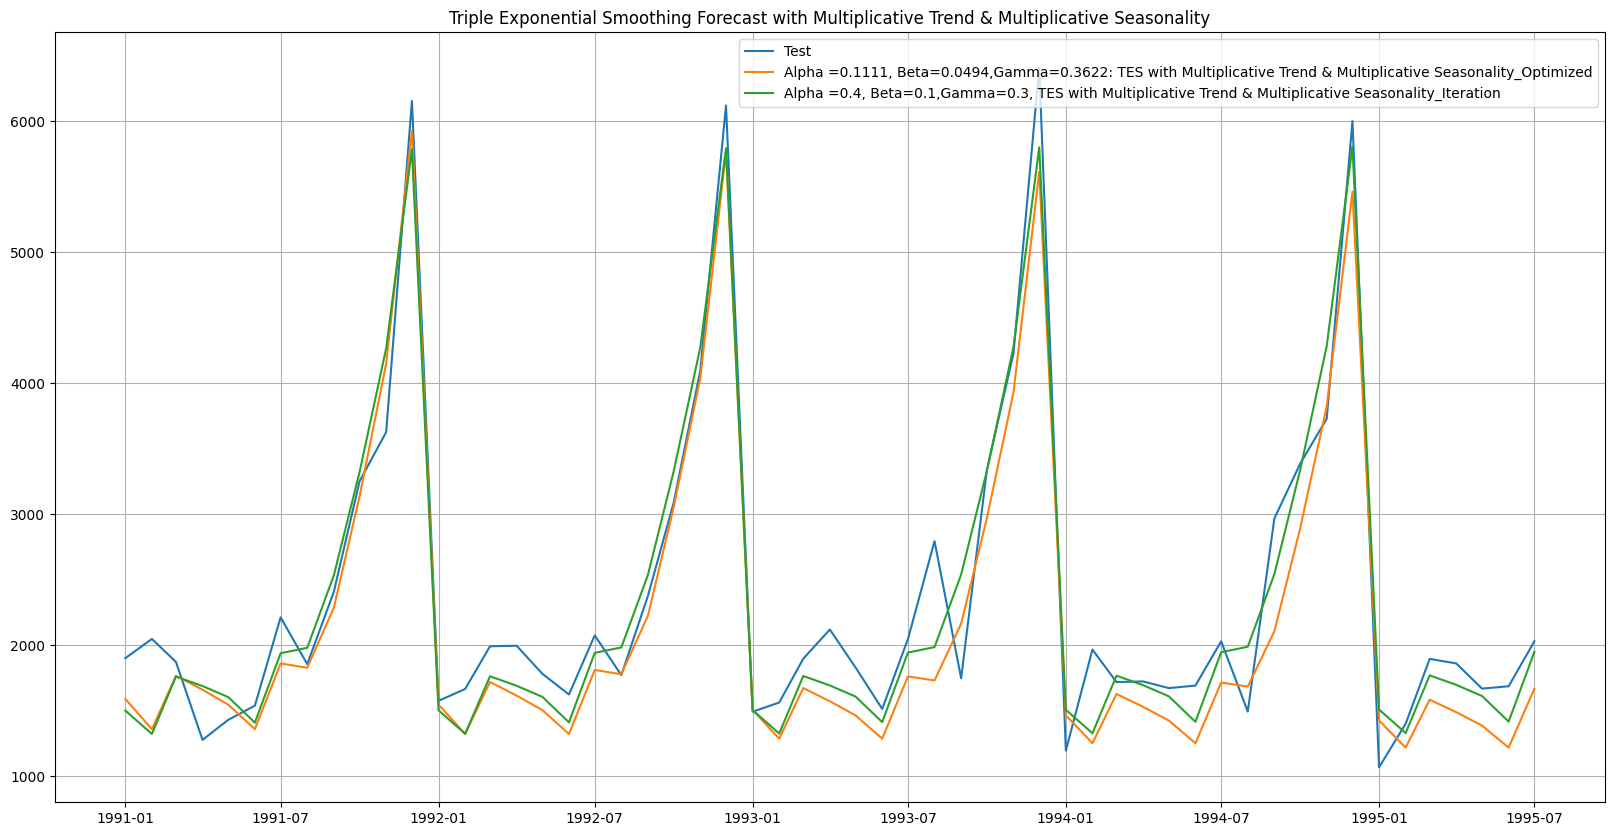

In [147]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.1111, Beta=0.0494,Gamma=0.3622: TES with Multiplicative Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_mult, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.3, TES with Multiplicative Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [148]:
rmse_tes_mult_mult = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_mult,squared=False)
rmse_tes_mult_mult

326.579641343189

In [189]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_mult]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality Alpha =0.4, Beta=0.1,Gamma=0.3'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825
Triple Exponential Smoothing Forecast with Mult...   326.579641

### Model 9: Triple Exponential Smoothing with Multiplicative Trend & Additive Seasonality

In [149]:
tes_mult_add_optimized = ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
                                              seasonal='additive').fit(optimized=True)
tes_mult_add_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.115259       True
smoothing_trend      beta     0.013289       True
smoothing_seasonal  gamma     0.456594       True
initial_level         l.0  2357.238889       True
initial_trend         b.0     0.999461       True
initial_seasons.0     s.0  -636.770035       True
initial_seasons.1     s.1  -723.389560       True
initial_seasons.2     s.2  -397.619345       True
initial_seasons.3     s.3  -473.715104       True
initial_seasons.4     s.4  -808.950393       True
initial_seasons.5     s.5  -815.859884       True
initial_seasons.6     s.6  -384.232552       True
initial_seasons.7     s.7    73.668066       True
initial_seasons.8     s.8  -238.147886       True
initial_seasons.9     s.9   272.170709       True
initial_seasons.10   s.10  1542.709502       True
initial_seasons.11   s.11  2591.095963       True

In [150]:
df_test['forecast_tes_mult_add_optimized'] = tes_mult_add_optimized.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_mult_add_optimized']].head().round(3)

Sparkling  forecast_tes_mult_add_optimized
YearMonth                                             
1991-01-01       1902                         1484.432
1991-02-01       2049                         1200.193
1991-03-01       1874                         1683.865
1991-04-01       1279                         1547.845
1991-05-01       1432                         1457.653

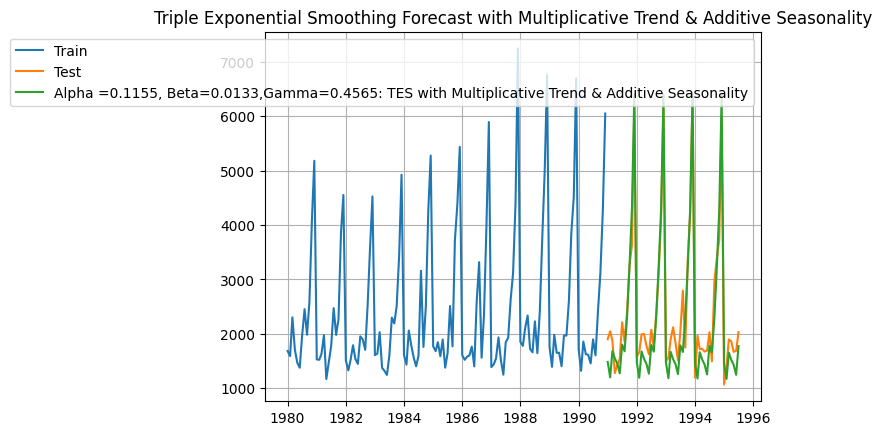

In [151]:
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [152]:
rmse_tes_mult_add_optimized = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_add_optimized,squared=False)
rmse_tes_mult_add_optimized

379.6464473298829

In [190]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_add_optimized]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825
Triple Exponential Smoothing Forecast with Mult...   326.579641
Triple Exponential Smoothing Forecast with Mult...   379.646447


`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [153]:
results_tes_mult_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_add_iteration=ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',
            seasonal='additive').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Sparkling,tes_mult_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Sparkling,tes_mult_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_add=results_tes_mult_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_add

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  4.299330e+02   4.646094e+02
1             0.1          0.1           0.2  4.019163e+02   5.679937e+02
2             0.1          0.1           0.3  3.866093e+02   6.548361e+02
3             0.1          0.1           0.4  3.798584e+02   7.096843e+02
4             0.1          0.1           0.5  3.790537e+02   7.386989e+02
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  3.445069e+03   7.654216e+03
725           0.9          0.9           0.6  6.687150e+04   3.661015e+07
726           0.9          0.9           0.7  1.284128e+08   2.371203e+69
727           0.9          0.9           0.8  1.733337e+12  1.059654e+150
728           0.9          0.9           0.9  2.169427e+29            inf

[729 rows x 5 columns]

In [154]:
results_tes_mult_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
244           0.4          0.1           0.2       440.0      341.7
27            0.1          0.4           0.1       456.9      341.8
81            0.2          0.1           0.1       443.2      356.6
90            0.2          0.2           0.1       458.0      359.6
18            0.1          0.3           0.1       446.6      375.2

`Final TES Model with Additive Trend & Additive Seasonality`

In [155]:
tes_mult_add= ExponentialSmoothing(df_train.Sparkling,initialization_method='estimated',trend='multiplicative',seasonal='additive').fit(
    smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2, optimized=False,use_brute=True)
tes_mult_add.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name        param  optimized
smoothing_level     alpha     0.400000      False
smoothing_trend      beta     0.100000      False
smoothing_seasonal  gamma     0.200000      False
initial_level         l.0  2356.541667      False
initial_trend         b.0     0.996104      False
initial_seasons.0     s.0  -636.186632      False
initial_seasons.1     s.1  -722.947049      False
initial_seasons.2     s.2  -398.707465      False
initial_seasons.3     s.3  -473.405382      False
initial_seasons.4     s.4  -808.384549      False
initial_seasons.5     s.5  -815.311632      False
initial_seasons.6     s.6  -384.228299      False
initial_seasons.7     s.7    72.948785      False
initial_seasons.8     s.8  -237.394965      False
initial_seasons.9     s.9   272.334201      False
initial_seasons.10   s.10  1541.282118      False
initial_seasons.11   s.11  2590.000868      False

In [156]:
df_test['forecast_tes_mult_add'] = tes_mult_add.forecast(steps=len(df_test))
df_test[['Sparkling','forecast_tes_mult_add_optimized','forecast_tes_mult_add']].head().round(3)

Sparkling  forecast_tes_mult_add_optimized  forecast_tes_mult_add
YearMonth                                                                    
1991-01-01       1902                         1484.432               1265.089
1991-02-01       2049                         1200.193               1187.835
1991-03-01       1874                         1683.865               1695.662
1991-04-01       1279                         1547.845               1693.735
1991-05-01       1432                         1457.653               1608.545

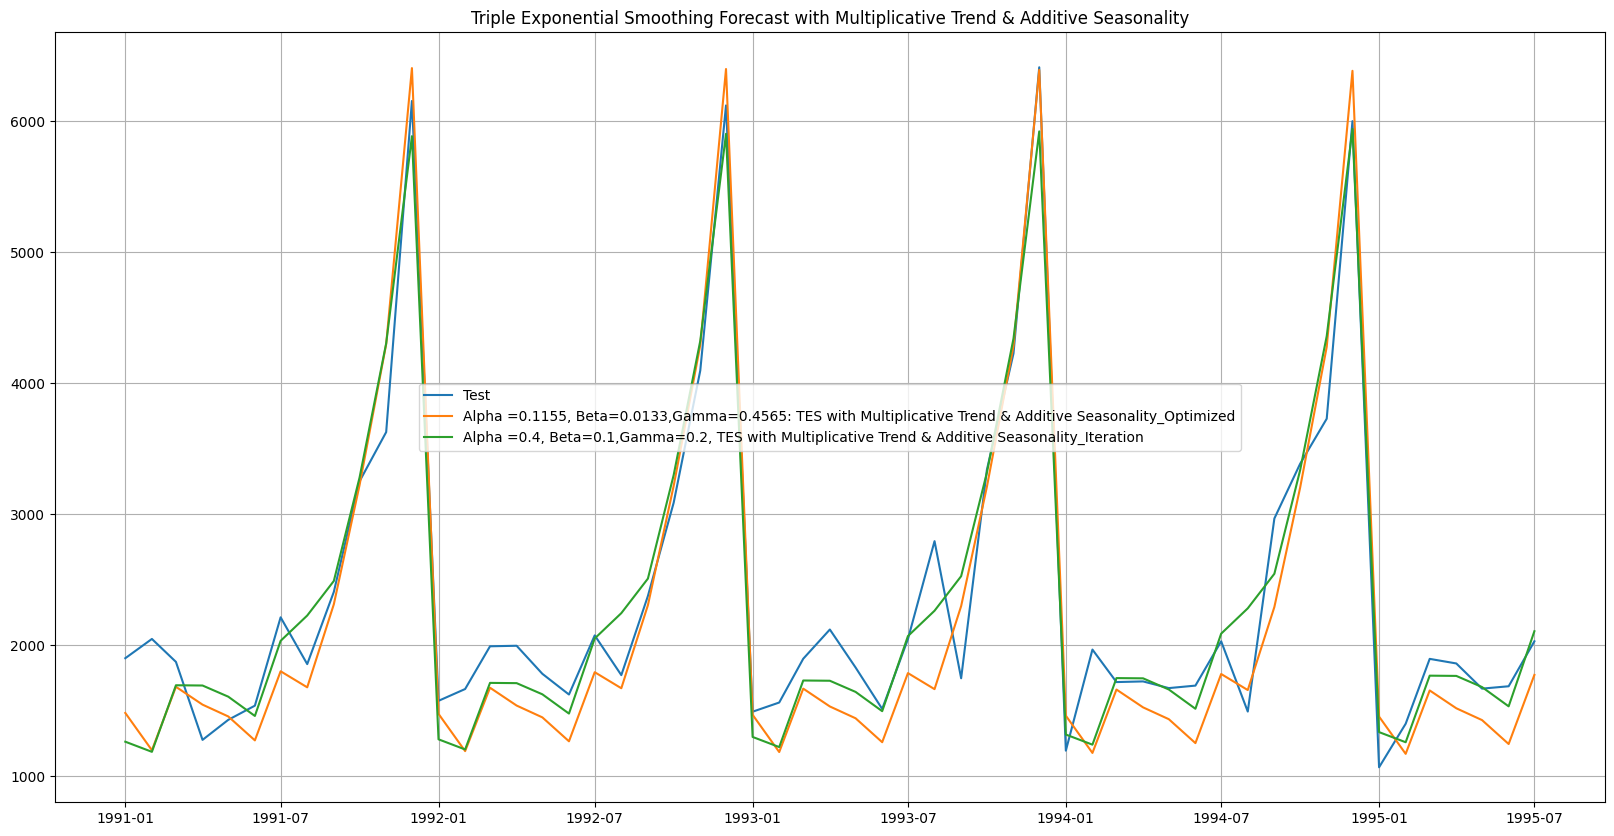

In [157]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')

plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_add, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.2, TES with Multiplicative Trend & Additive Seasonality_Iteration')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [158]:
rmse_tes_mult_add = mean_squared_error(df_test.Sparkling,df_test.forecast_tes_mult_add,squared=False)
rmse_tes_mult_add

341.6535254244066

In [191]:
resultsDf_15 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_add]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality Alpha =0.4, Beta=0.1,Gamma=0.2'])

resultsDf = pd.concat([resultsDf, resultsDf_15])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825
Triple Exponential Smoothing Forecast with Mult...   326.579641
Triple Exponential Smoothing Forecast with Mult...   379.646447
Triple Exponential Smoothing Forecast with Mult...   341.653525

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


`Plot the Time Series`

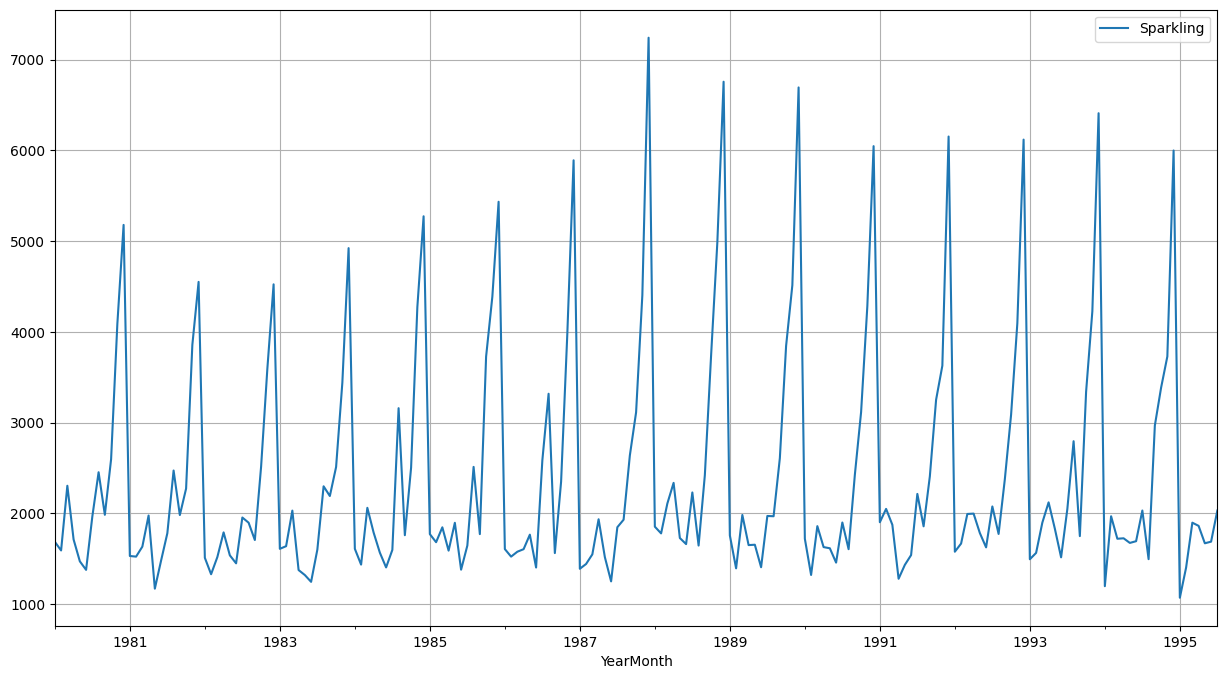

In [ ]:
df.plot()
plt.grid()

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

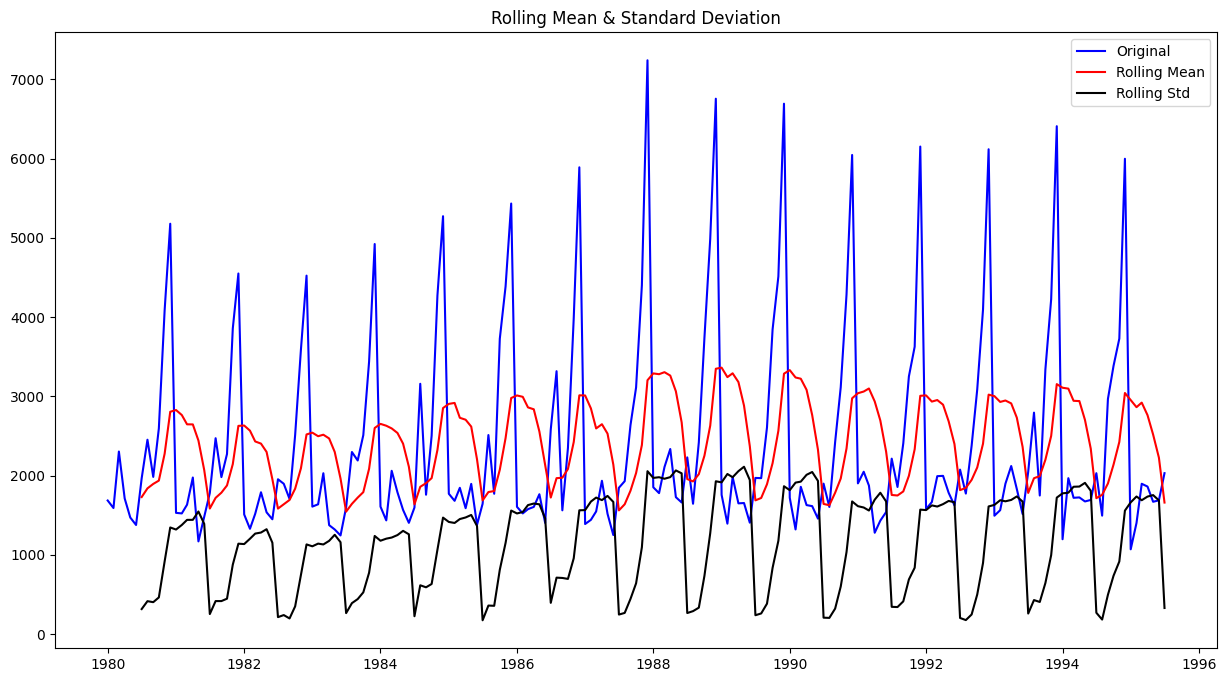

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df)

On differencing Dataset

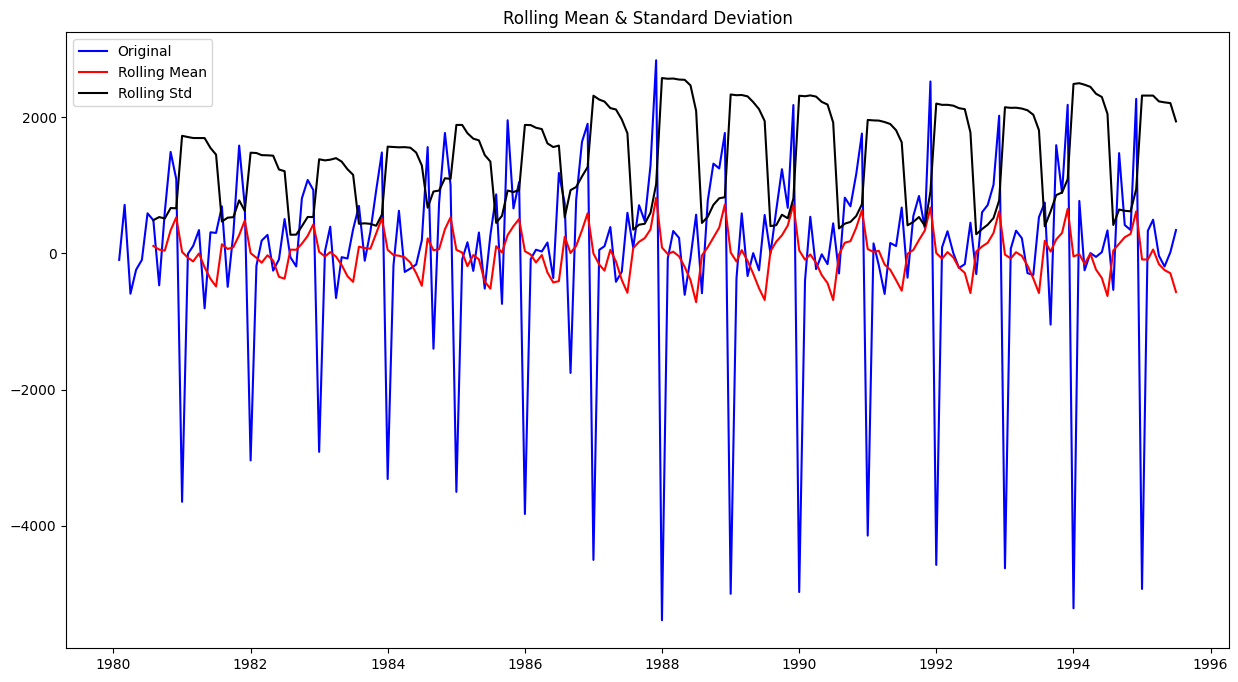

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df.diff().dropna())


`Plotting Differenced Time Series`

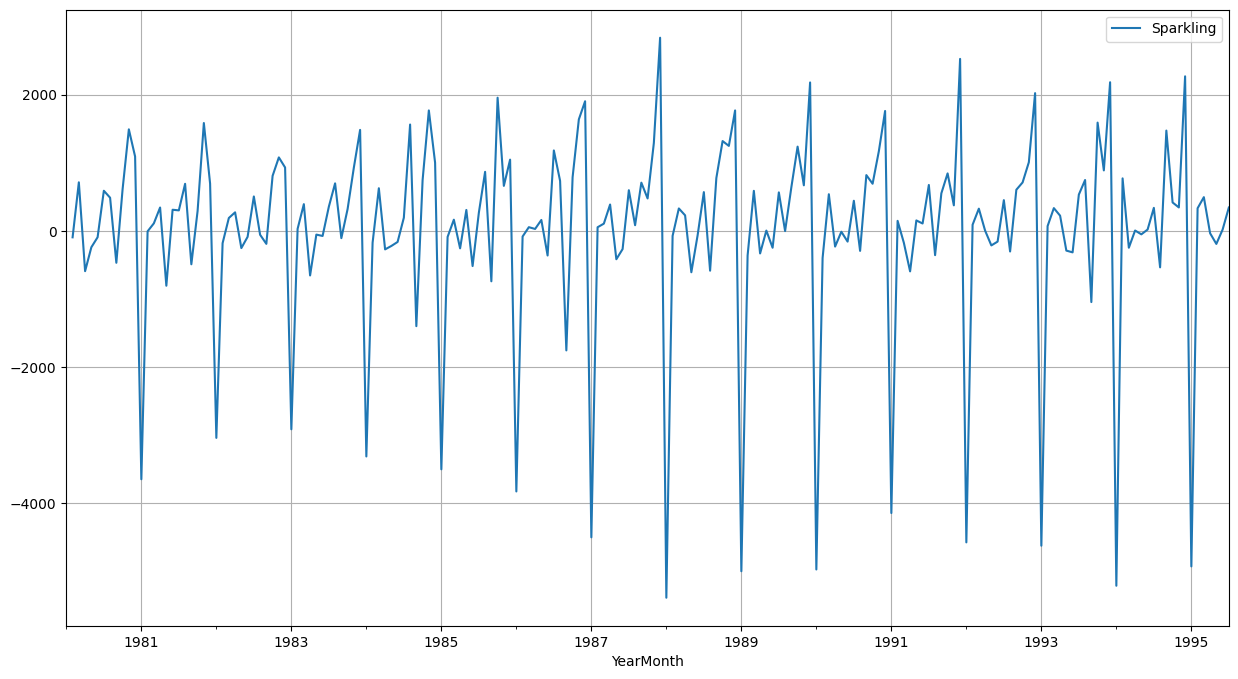

In [ ]:
df.diff().plot()
plt.grid()

`Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data`

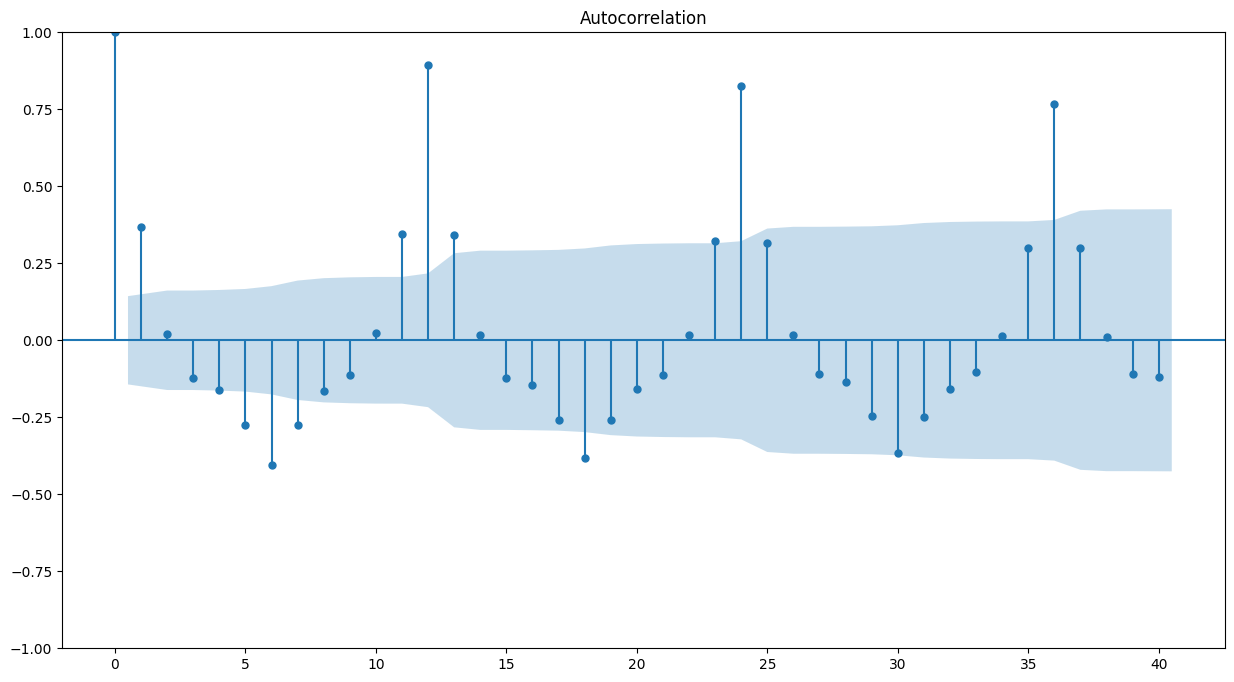

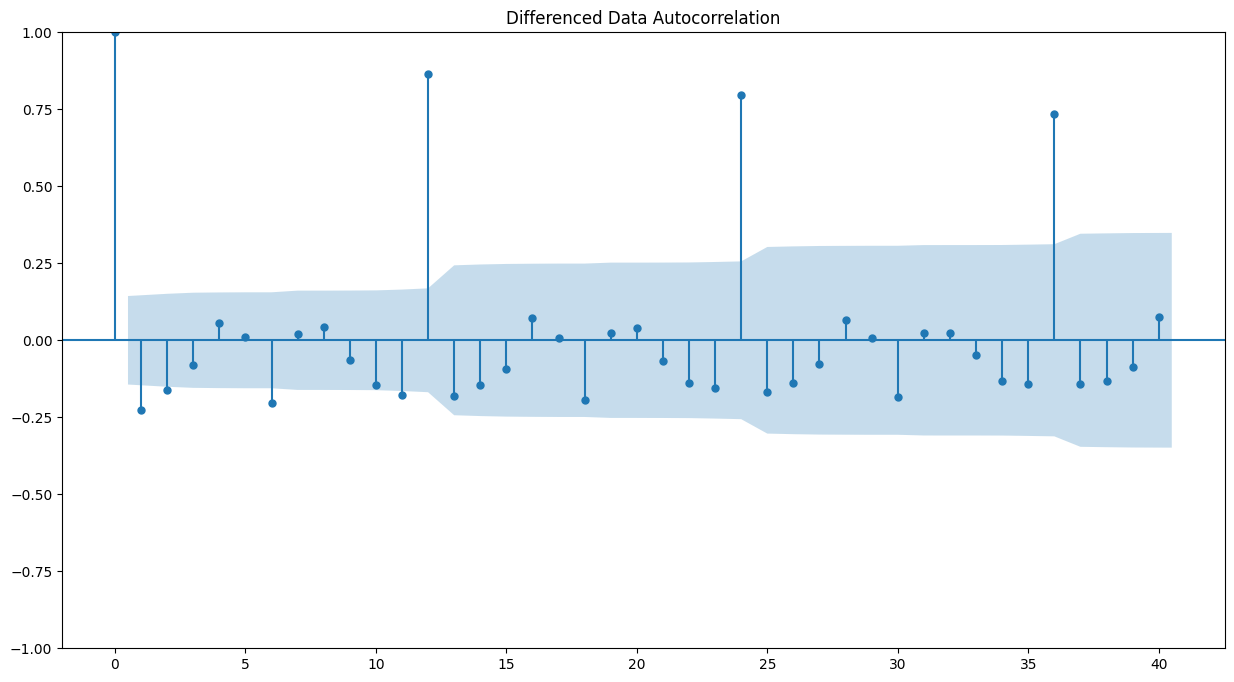

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df,alpha=0.05,lags=40);
plot_acf(df.diff().dropna(),alpha=0.05,lags=40,title='Differenced Data Autocorrelation');

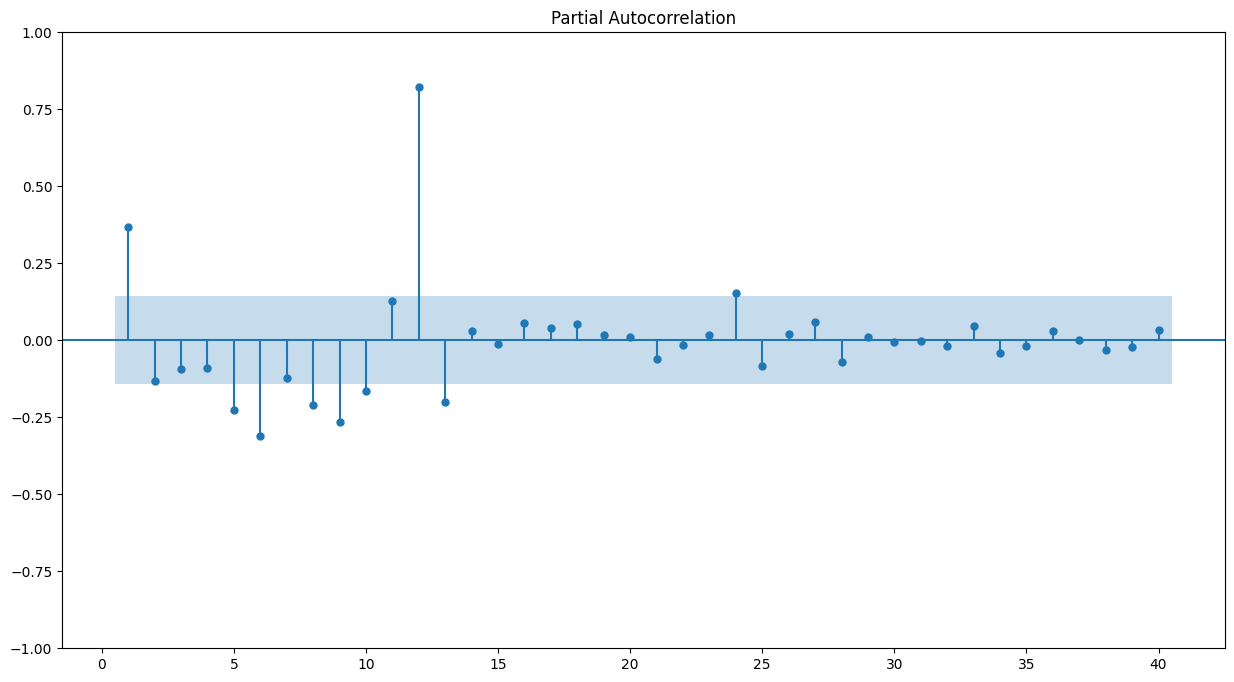

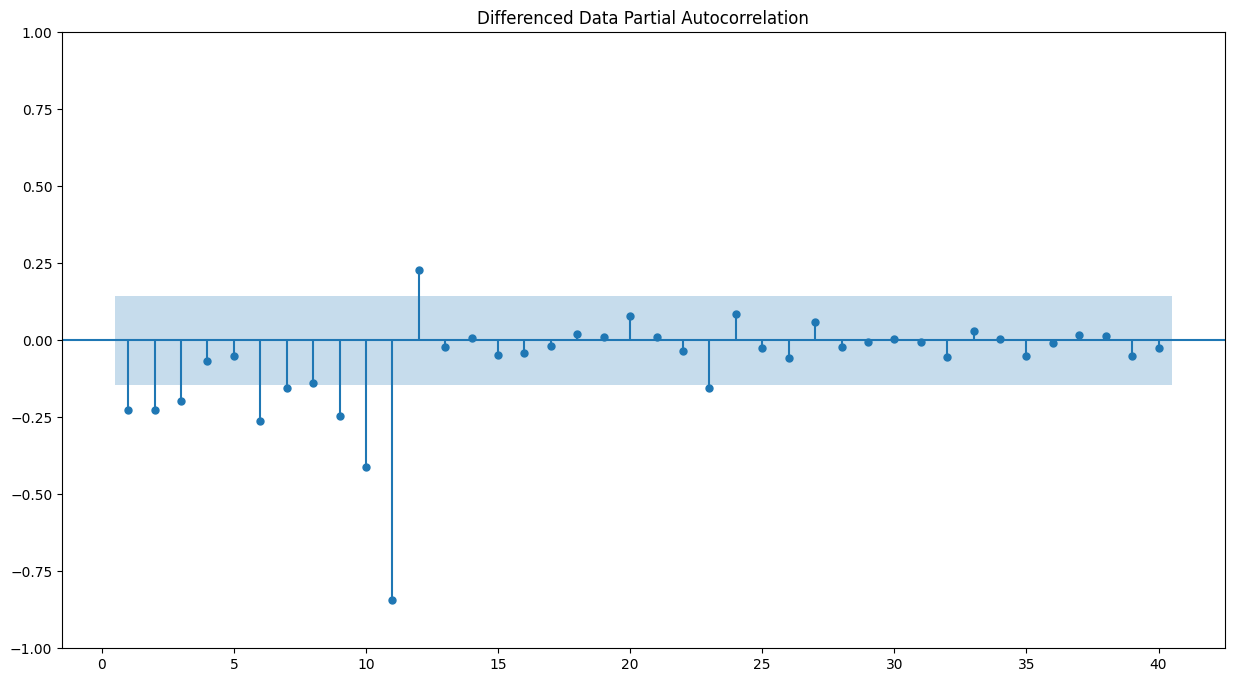

In [ ]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle',lags=40);
plot_pacf(df.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40,
          title='Differenced Data Partial Autocorrelation');

`Check for Stationarity of Train Dataset`

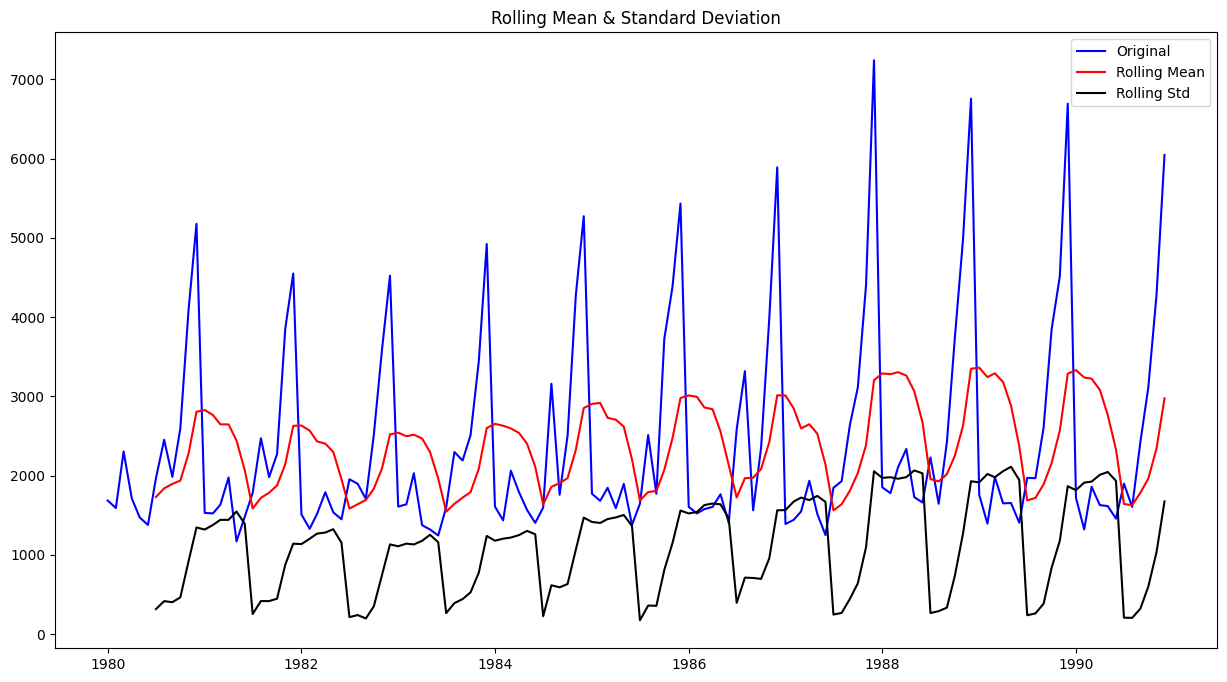

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [ ]:
test_stationarity(df_train.Sparkling)

`On differencing Train Dataset`

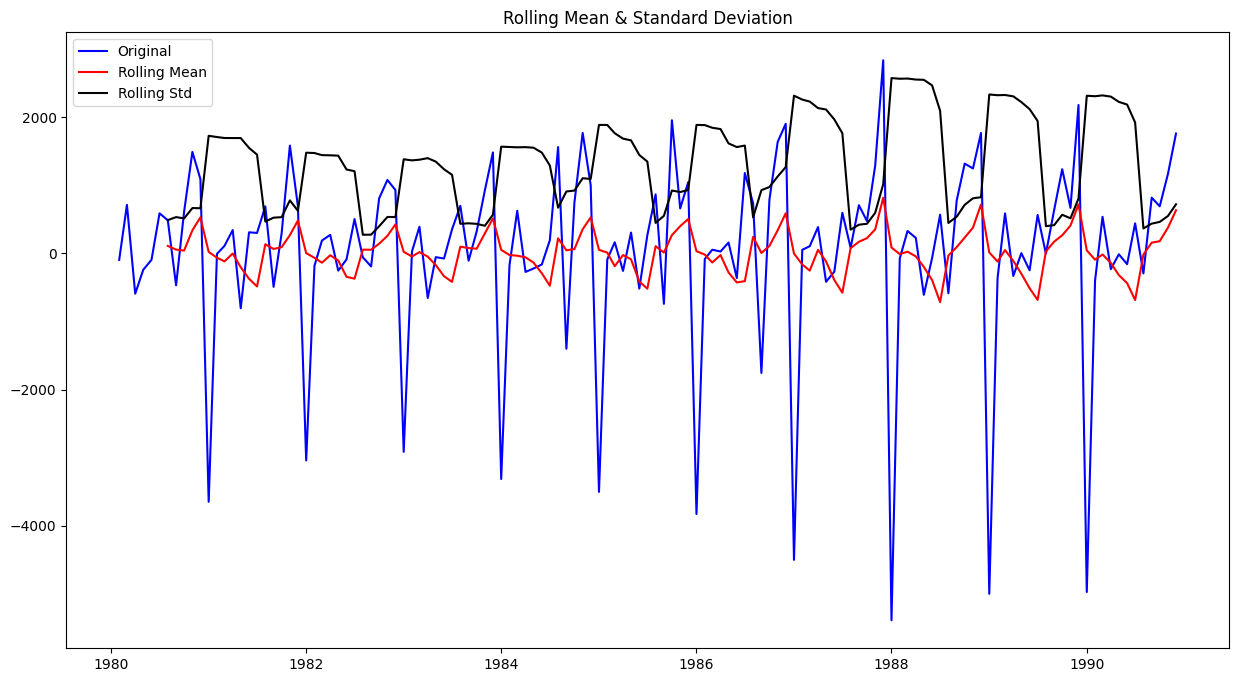

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [ ]:
test_stationarity(df_train.Sparkling.diff().dropna())

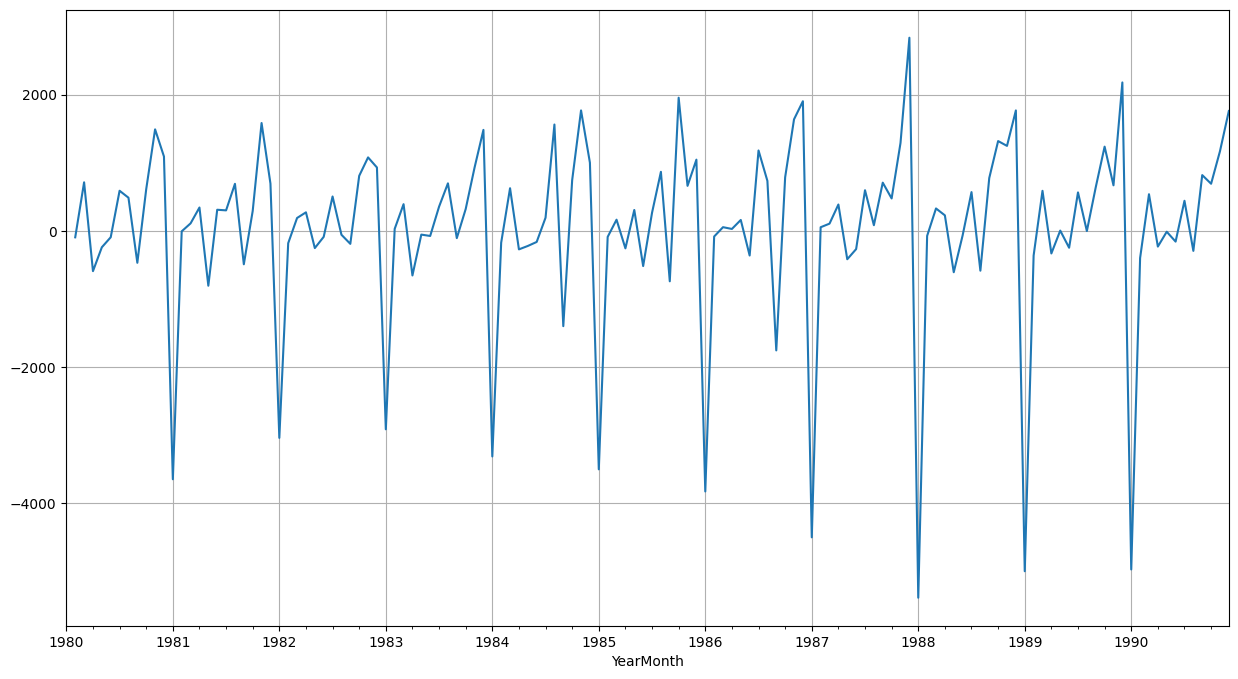

In [ ]:
df_train.Sparkling.diff().plot()
plt.grid()

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

`ARIMA Automated Version`

In [65]:
import itertools
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [66]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [67]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])

In [68]:
for param in pdq:
    ARIMA_model=ARIMA(df_train.Sparkling,order=param).fit()
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
ARIMA_AIC

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

param          AIC
0   (0, 1, 0)  2267.663036
1   (0, 1, 1)  2263.060016
2   (0, 1, 2)  2234.408323
3   (0, 1, 3)  2233.994858
4   (1, 1, 0)  2266.608539
5   (1, 1, 1)  2235.755095
6   (1, 1, 2)  2234.527200
7   (1, 1, 3)  2235.607816
8   (2, 1, 0)  2260.365744
9   (2, 1, 1)  2233.777626
10  (2, 1, 2)  2213.509213
11  (2, 1, 3)  2232.812955
12  (3, 1, 0)  2257.723379
13  (3, 1, 1)  2235.500424
14  (3, 1, 2)  2230.789978
15  (3, 1, 3)  2221.457398

In [69]:
ARIMA_AIC.sort_values(by='AIC').head().round(1)

param     AIC
10  (2, 1, 2)  2213.5
15  (3, 1, 3)  2221.5
14  (3, 1, 2)  2230.8
11  (2, 1, 3)  2232.8
9   (2, 1, 1)  2233.8

In [70]:
ARIMA_auto=ARIMA(df_train.Sparkling,order=(2, 1, 2)).fit()
ARIMA_auto.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 23 Apr 2023   AIC                           2213.509
Time:                        06:54:56   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.000      -2.206      -1.777
ma.L2          0.9999      0.110      9.108      0.000       0.785       1.215
sigma2      1.099e+06      2e-07   5.51e+12      0.000     1.1e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                14.46
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.46e+29. Standard errors may be unstable.
"""

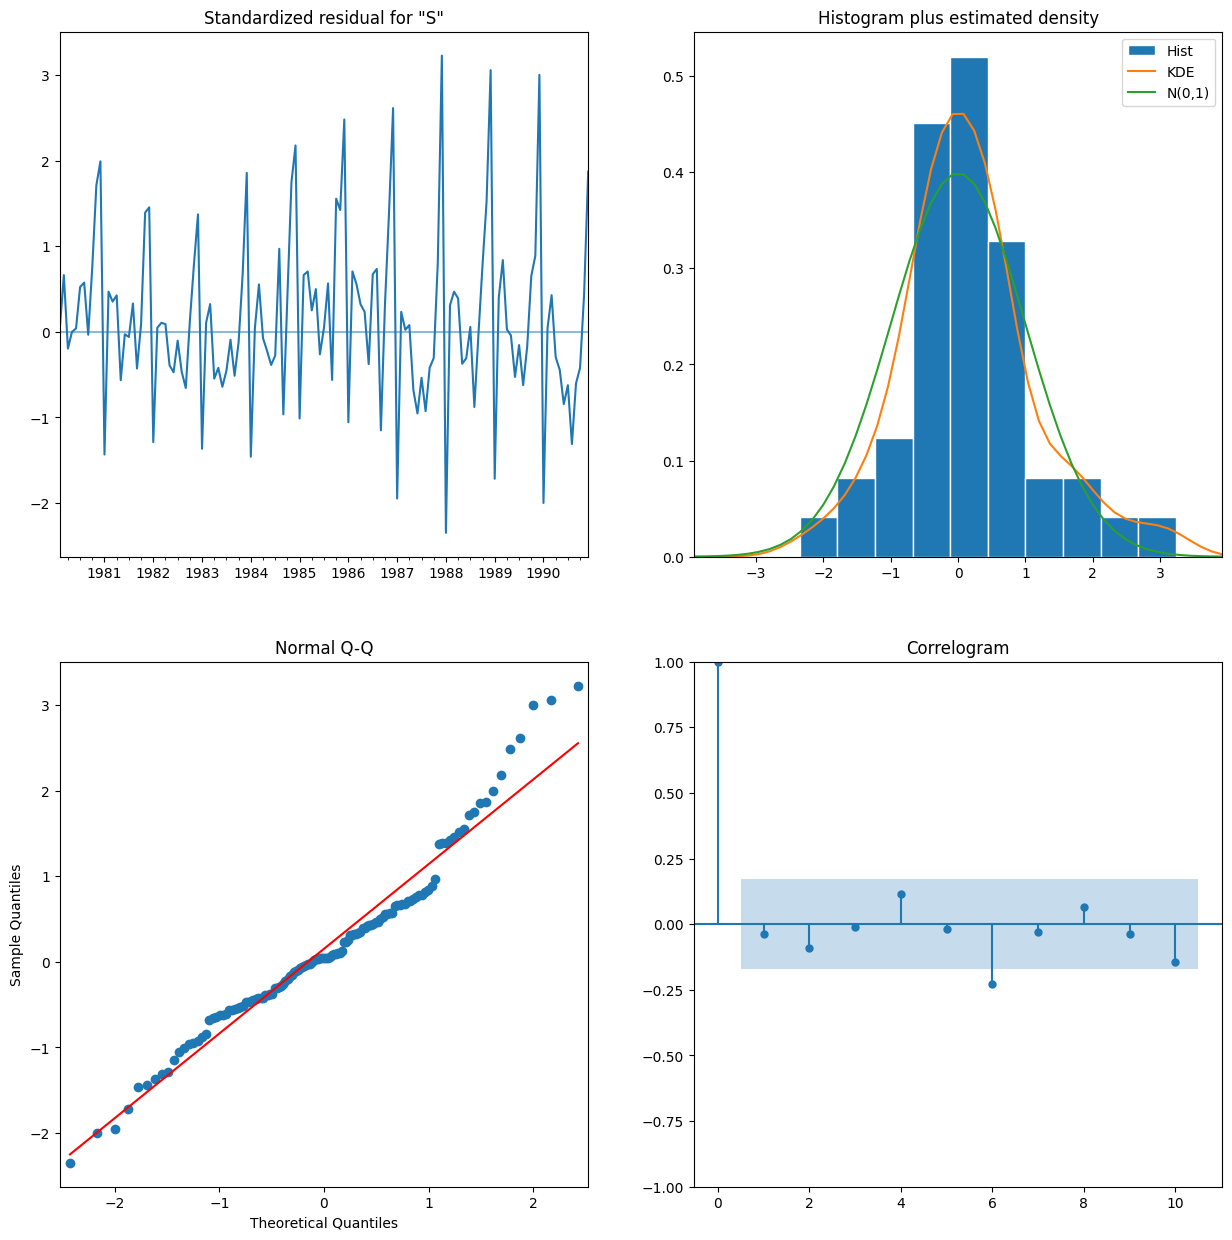

In [71]:
ARIMA_auto.plot_diagnostics(figsize=(15,15));

`Forecast on Test Dataset`

In [72]:
df_test['forecast_ARIMA_auto']=ARIMA_auto.forecast(len(df_test))
df_test[['Sparkling','forecast_ARIMA_auto']].head().round(3)

Sparkling  forecast_ARIMA_auto
YearMonth                                 
1991-01-01       1902             4252.352
1991-02-01       2049             2863.095
1991-03-01       1874             2043.976
1991-04-01       1279             1746.208
1991-05-01       1432             1813.632

In [165]:
from sklearn.metrics import mean_squared_error

rmse_ARIMA_auto=mean_squared_error(df_test.Sparkling,df_test.forecast_ARIMA_auto,squared=False)
rmse_ARIMA_auto

1299.9797494286825

In [192]:
resultsDf_16 = pd.DataFrame({'Test RMSE': [rmse_ARIMA_auto]},index=['forecast_ARIMA_auto'])

resultsDf = pd.concat([resultsDf, resultsDf_16])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825
Triple Exponential Smoothing Forecast with Mult...   326.579641
Triple Exponential Smoothing Forecast with Mult...   379.646447
Triple Exponential Smoothing Forecast with Mult...   341.653525
forecast_ARIMA_auto                                 1299.979749

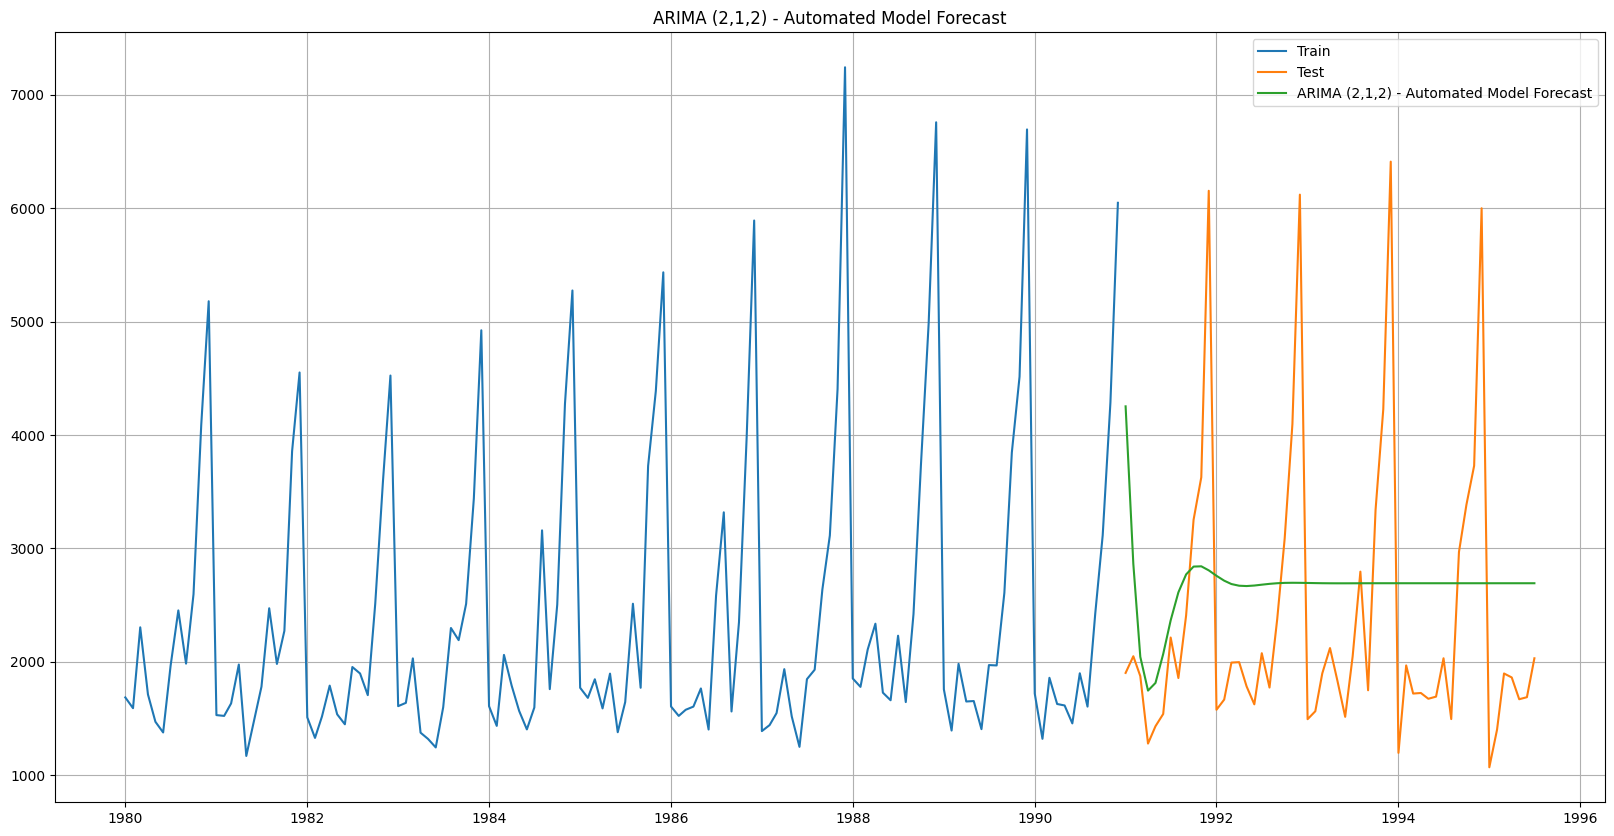

In [74]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (2,1,2) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2,1,2) - Automated Model Forecast');

SARIMA - Automated Version

In [75]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq=list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
display(pdq)
display(PDQ)

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

[(0, 0, 0, 6),
 (0, 0, 1, 6),
 (0, 0, 2, 6),
 (0, 0, 3, 6),
 (0, 1, 0, 6),
 (0, 1, 1, 6),
 (0, 1, 2, 6),
 (0, 1, 3, 6),
 (1, 0, 0, 6),
 (1, 0, 1, 6),
 (1, 0, 2, 6),
 (1, 0, 3, 6),
 (1, 1, 0, 6),
 (1, 1, 1, 6),
 (1, 1, 2, 6),
 (1, 1, 3, 6),
 (2, 0, 0, 6),
 (2, 0, 1, 6),
 (2, 0, 2, 6),
 (2, 0, 3, 6),
 (2, 1, 0, 6),
 (2, 1, 1, 6),
 (2, 1, 2, 6),
 (2, 1, 3, 6),
 (3, 0, 0, 6),
 (3, 0, 1, 6),
 (3, 0, 2, 6),
 (3, 0, 3, 6),
 (3, 1, 0, 6),
 (3, 1, 1, 6),
 (3, 1, 2, 6),
 (3, 1, 3, 6)]

In [76]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [77]:
for i in PDQ:
    print(i, end=", ")

(0, 0, 0, 6), (0, 0, 1, 6), (0, 0, 2, 6), (0, 0, 3, 6), (0, 1, 0, 6), (0, 1, 1, 6), (0, 1, 2, 6), (0, 1, 3, 6), (1, 0, 0, 6), (1, 0, 1, 6), (1, 0, 2, 6), (1, 0, 3, 6), (1, 1, 0, 6), (1, 1, 1, 6), (1, 1, 2, 6), (1, 1, 3, 6), (2, 0, 0, 6), (2, 0, 1, 6), (2, 0, 2, 6), (2, 0, 3, 6), (2, 1, 0, 6), (2, 1, 1, 6), (2, 1, 2, 6), (2, 1, 3, 6), (3, 0, 0, 6), (3, 0, 1, 6), (3, 0, 2, 6), (3, 0, 3, 6), (3, 1, 0, 6), (3, 1, 1, 6), (3, 1, 2, 6), (3, 1, 3, 6), 

In [78]:
SARIMA_AIC = pd.DataFrame(columns=['param','param_seasonal', 'AIC'])

import statsmodels.api as sm

for i in pdq:
    for j in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(df_train.Sparkling,order=i,seasonal_order=j,
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)
        SARIMA_AIC = SARIMA_AIC.append({'param':i,'param_seasonal':j ,'AIC': SARIMA_model.aic}, 
                                       ignore_index=True)
SARIMA_AIC  

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

param param_seasonal          AIC
0    (0, 1, 0)   (0, 0, 0, 6)  2251.359720
1    (0, 1, 0)   (0, 0, 1, 6)  2152.378076
2    (0, 1, 0)   (0, 0, 2, 6)  1955.635554
3    (0, 1, 0)   (0, 0, 3, 6)  1863.784515
4    (0, 1, 0)   (0, 1, 0, 6)  2262.983524
..         ...            ...          ...
507  (3, 1, 3)   (3, 0, 3, 6)  1638.441251
508  (3, 1, 3)   (3, 1, 0, 6)  1569.327219
509  (3, 1, 3)   (3, 1, 1, 6)  1565.860555
510  (3, 1, 3)   (3, 1, 2, 6)  1562.900000
511  (3, 1, 3)   (3, 1, 3, 6)  1555.651022

[512 rows x 3 columns]

In [79]:
SARIMA_AIC.sort_values(by='AIC').head().round(1)

param param_seasonal     AIC
495  (3, 1, 3)   (1, 1, 3, 6)  1541.6
111  (0, 1, 3)   (1, 1, 3, 6)  1544.0
367  (2, 1, 3)   (1, 1, 3, 6)  1545.7
503  (3, 1, 3)   (2, 1, 3, 6)  1545.8
239  (1, 1, 3)   (1, 1, 3, 6)  1545.9

In [80]:
SARIMA_auto=sm.tsa.statespace.SARIMAX(df_train.Sparkling,order=(2,1,3),seasonal_order=(2,1,3,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

SARIMA_auto.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -764.717
Date:                           Sun, 23 Apr 2023   AIC                           1551.434
Time:                                   07:12:48   BIC                           1580.416
Sample:                               01-01-1980   HQIC                          1563.173
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1948      0.416      2.872      0.004       0.379       2.010
ar.L2         -0.6129      0.470     -1.303      0.193      -1.535       0.309
ma.L1         -3.7588      2.220     -1.693      0.090      -8.110       0.593
ma.L2          5.1370      5.012      1.025      0.305      -4.686      14.959
ma.L3         -2.5613      3.026     -0.846      0.397      -8.492       3.369
ar.S.L6       -1.4032      0.587     -2.392      0.017      -2.553      -0.254
ar.S.L12      -0.3885      0.599     -0.649      0.516      -1.562       0.785
ma.S.L6        4.6112      9.203      0.501      0.616     -13.427      22.650
ma.S.L12       1.2859      5.110      0.252      0.801      -8.730      11.302
ma.S.L18      -3.2906      7.428     -0.443      0.658     -17.849      11.268
sigma2      1024.6637   5171.896      0.198      0.843   -9112.067    1.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                41.74
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.56
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

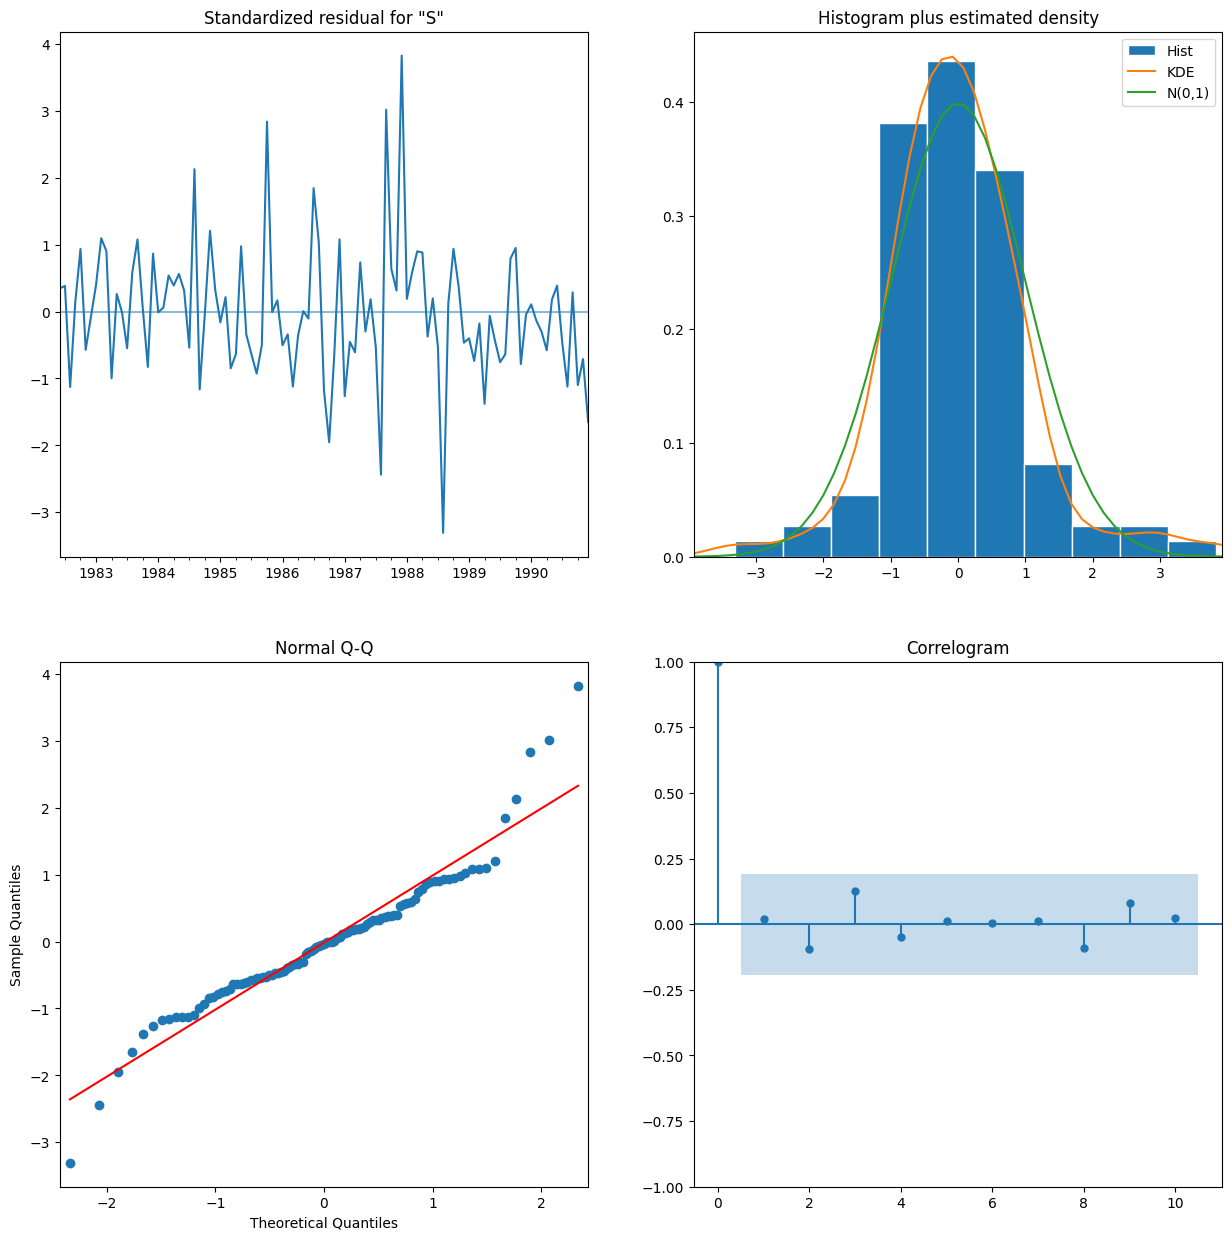

In [81]:
SARIMA_auto.plot_diagnostics(figsize=(15,15));

`Prediction on Test Dataset`

In [82]:
df_test['forecast_SARIMA_auto']=SARIMA_auto.forecast(steps=len(df_test))

df_test[['Sparkling','forecast_ARIMA_auto','forecast_SARIMA_auto']].head(10).round(1)

Sparkling  forecast_ARIMA_auto  forecast_SARIMA_auto
YearMonth                                                       
1991-01-01       1902               4252.4                1447.0
1991-02-01       2049               2863.1                1105.4
1991-03-01       1874               2044.0                1696.3
1991-04-01       1279               1746.2                1452.0
1991-05-01       1432               1813.6                1151.8
1991-06-01       1540               2068.6                 851.4
1991-07-01       2214               2365.5                1614.2
1991-08-01       1857               2612.5                1523.0
1991-09-01       2408               2770.4                2092.4
1991-10-01       3252               2839.5                3062.3

In [83]:
rmse_SARIMA_auto=mean_squared_error(df_test.Sparkling,df_test.forecast_SARIMA_auto,squared=False)
rmse_SARIMA_auto

867.3836025286024

In [193]:
resultsDf_17 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto]},index=['forecast_SARIMA_auto'])

resultsDf = pd.concat([resultsDf, resultsDf_17])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Forecast                                      3864.279352
Simple Average                                      1275.081804
Simple Exponential Smoothing Forecast               1338.004623
Simple Exponential Smoothing Forecast with alph...  1375.393335
Double Exponential Smoothing Forecast               5291.879833
Double Exponential Smoothing Forecast Alpha =0....  1777.734773
Triple Exponential Smoothing Forecast with Addi...   378.626241
Triple Exponential Smoothing Forecast with addi...   342.934716
Triple Exponential Smoothing Forecast with Addi...   403.706228
Triple Exponential Smoothing Forecast with Addi...   317.434302
Triple Exponential Smoothing Forecast with Mult...   380.392825
Triple Exponential Smoothing Forecast with Mult...   326.579641
Triple Exponential Smoothing Forecast with Mult...   379.646447
Triple Exponential Smoothing Forecast with Mult...   341.653525
forecast_ARIMA_auto                                 1299.979749
forecast_SARIMA_auto                                 867.383603

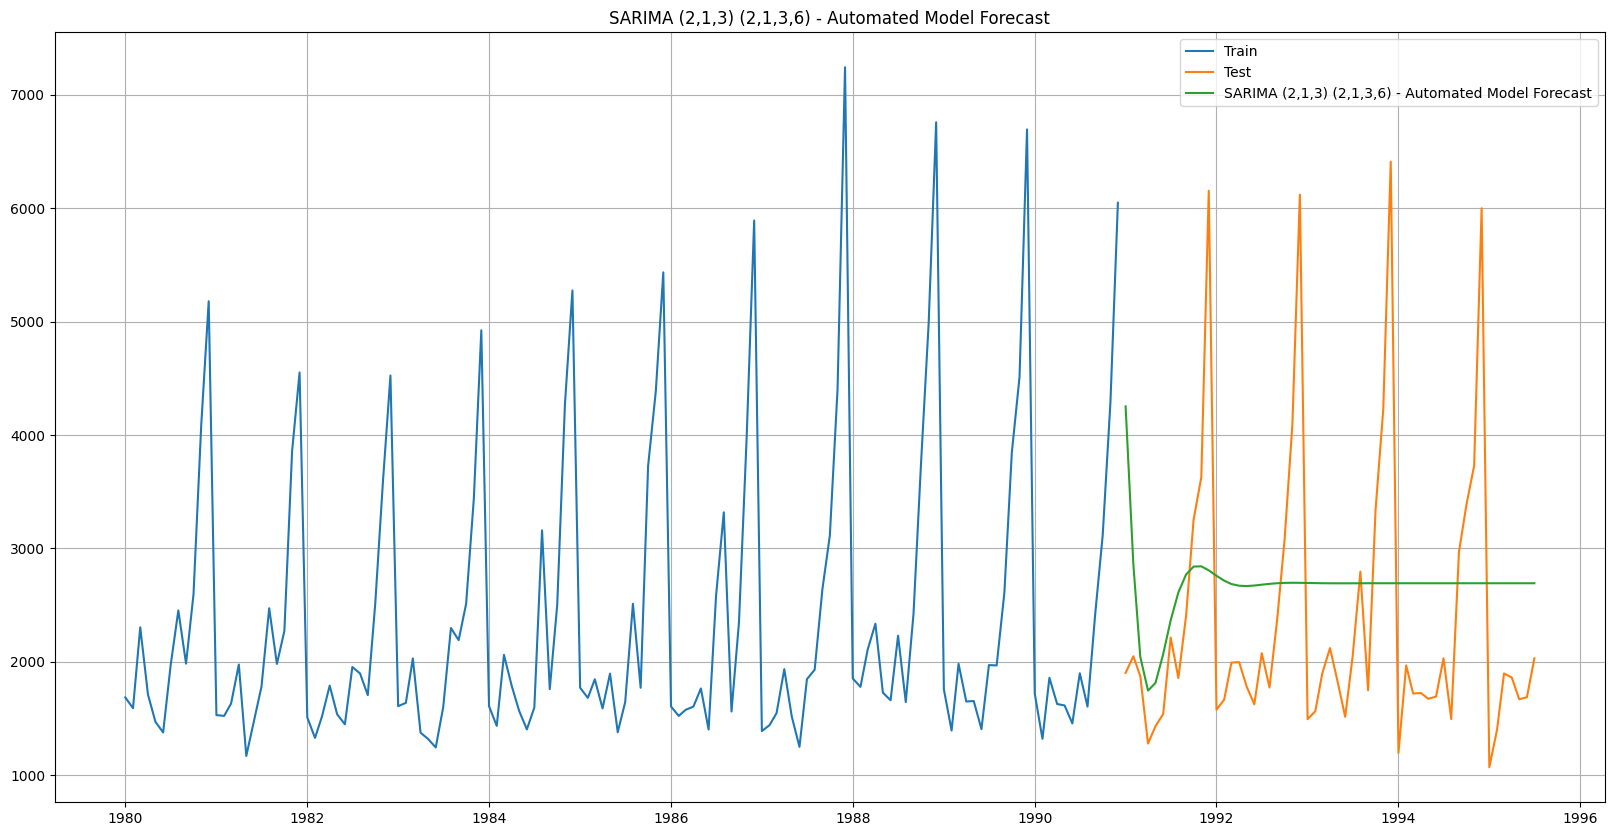

In [84]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Sparkling, label='Train')
plt.plot(df_test.Sparkling, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast');

## 7. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data

In [198]:
resultsDf.sort_values(by='Test RMSE').round(3)

Test RMSE
Triple Exponential Smoothing Forecast with Addi...    317.434
Triple Exponential Smoothing Forecast with Mult...    326.580
Triple Exponential Smoothing Forecast with Mult...    341.654
Triple Exponential Smoothing Forecast with addi...    342.935
Triple Exponential Smoothing Forecast with Addi...    378.626
Triple Exponential Smoothing Forecast with Mult...    379.646
Triple Exponential Smoothing Forecast with Mult...    380.393
Triple Exponential Smoothing Forecast with Addi...    403.706
forecast_SARIMA_auto                                  867.384
Simple Average                                       1275.082
forecast_ARIMA_auto                                  1299.980
Simple Exponential Smoothing Forecast                1338.005
Simple Exponential Smoothing Forecast with alph...   1375.393
Linear Regression                                    1389.135
Double Exponential Smoothing Forecast Alpha =0....   1777.735
Naive Forecast                                       3864.279
Double Exponential Smoothing Forecast                5291.880

## 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Optimum Model - Triple Exponential Smoothing with Additive Trend and Multiplicative Seasonality with Parameters as Alpha=0.4, Beta=0.1 and Gamma=0.2

In [199]:
fullmodel = ExponentialSmoothing(df.Sparkling,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)
rmse_fullmodel = mean_squared_error(df.Sparkling,fullmodel.fittedvalues,squared=False)
rmse_fullmodel

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


376.7746175147543

In [200]:
# Getting the predictions for the same number of times stamps that are present in the test data
forecast_fullmodel = fullmodel.forecast(steps=12)

In [201]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

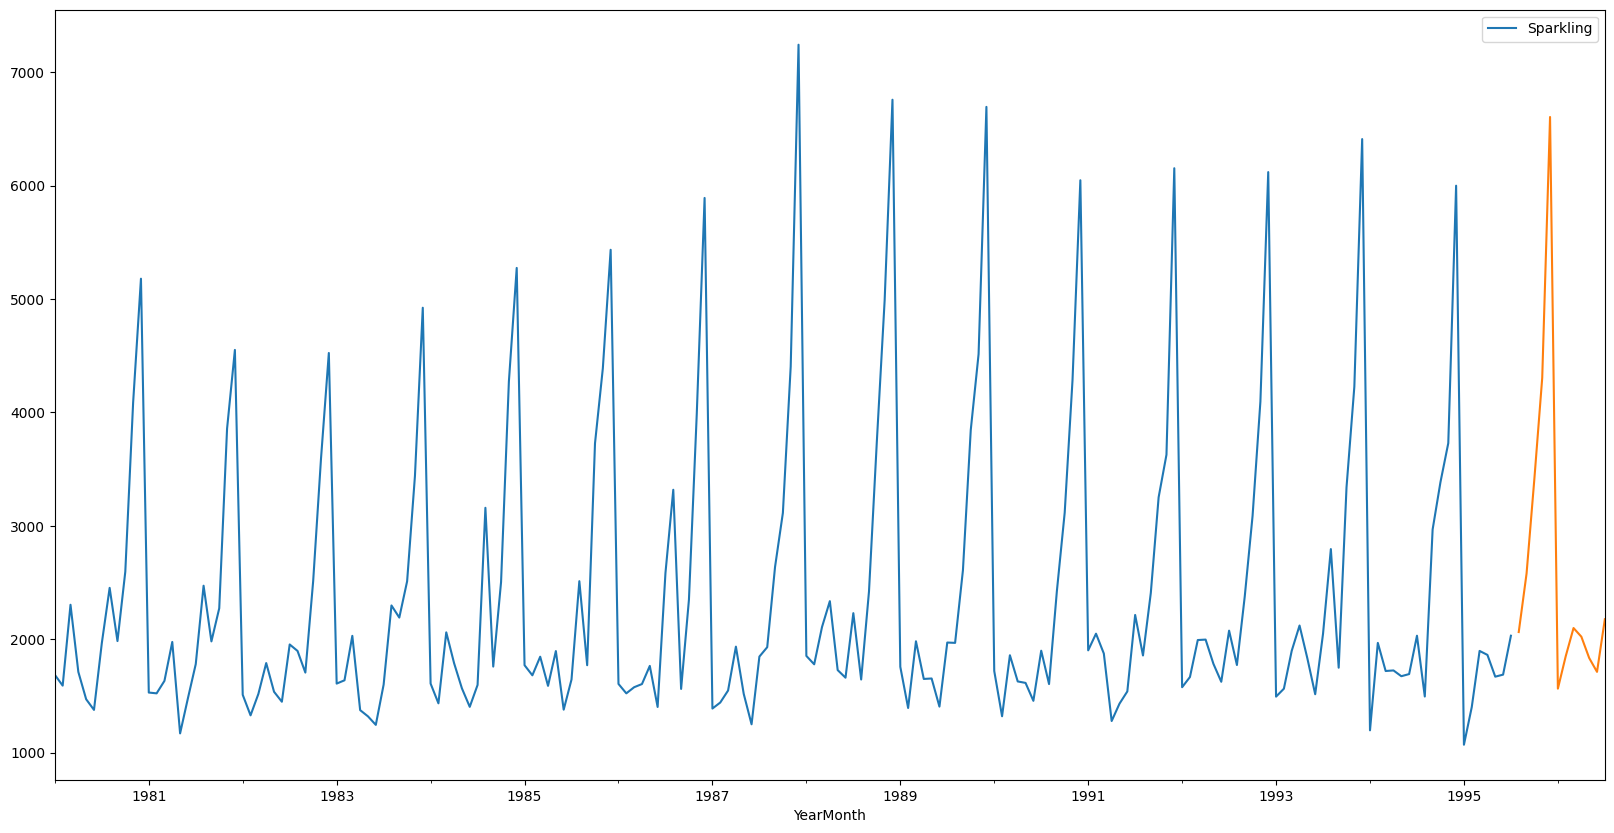

In [202]:
df.plot();
forecast_fullmodel.plot();

In [203]:
fullmodel.resid

YearMonth
1980-01-01    -26.472858
1980-02-01    -25.235485
1980-03-01    238.753710
1980-04-01   -229.010079
1980-05-01    -99.444343
                 ...    
1995-03-01    396.928238
1995-04-01    253.326041
1995-05-01    102.914981
1995-06-01    218.523141
1995-07-01     -7.666954
Length: 187, dtype: float64

In [204]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
forecast_df = pd.DataFrame({'lower_CI':forecast_fullmodel - 1.96*np.std(fullmodel.resid,ddof=1),
                          'Forecast':forecast_fullmodel,
                          'upper_ci': forecast_fullmodel + 1.96*np.std(fullmodel.resid,ddof=1)})
forecast_df.round(1)

lower_CI  Forecast  upper_ci
1995-08-01    1323.0    2063.4    2803.9
1995-09-01    1838.9    2579.4    3319.9
1995-10-01    2676.2    3416.7    4157.1
1995-11-01    3564.0    4304.5    5044.9
1995-12-01    5864.4    6604.9    7345.3
1996-01-01     824.1    1564.5    2305.0
1996-02-01    1109.3    1849.8    2590.2
1996-03-01    1358.4    2098.9    2839.3
1996-04-01    1282.0    2022.4    2762.9
1996-05-01    1094.1    1834.5    2575.0
1996-06-01     971.9    1712.4    2452.9
1996-07-01    1436.0    2176.4    2916.9

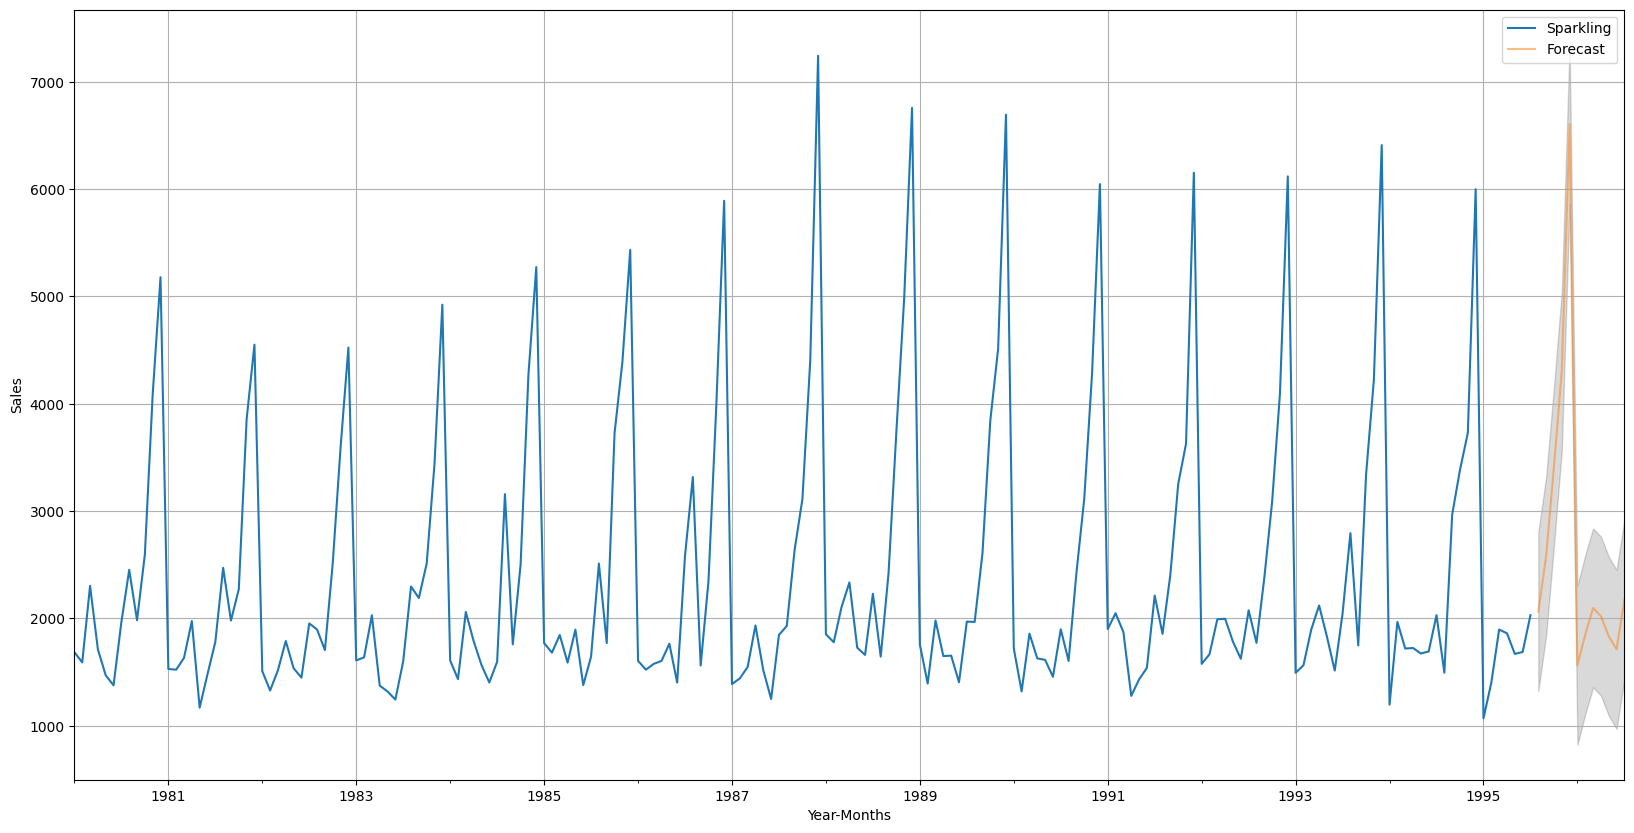

In [205]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(20,10))
forecast_df['Forecast'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(forecast_df.index, forecast_df['lower_CI'], forecast_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

The Best model is the triple exponential smoothing with additive trend and multiplicative seasonality with the parameters with alpha = 0.4, beta =0.1 and gamma = 0.2

RMSE is 377.3

Plot of 12 month forecast is following similar pattern as original data

Sales is increasing gradually  then exponentially as per the pattern observed the actual data

We can expect that sales has no pattern till september 


Measures to increase sales: 

During peak season maximum stock should be available for more sales

Find out the reason why sales is less in other months

Since the trend is upwards the forecasted value is good
